<a href="https://colab.research.google.com/github/itagnats/itagnats/blob/main/Tunning_Research_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Bert, Wangchanberta, Roberta**
โมเดลหลักที่ใช้ในงานวิจัย\
Bert, ALBERT, RoBERTa, TF-IDF

# Import Library

In [ ]:
# require GPU to run transformer model
import matplotlib
print(matplotlib.__version__)
!pip -q install torch==1.5.0 torchtext==0.4.0 torchvision==0.6.0
!pip -q install transformers==3.5.0

from transformers import (AutoTokenizer, AutoModel, pipeline, AutoModelForSequenceClassification)


3.5.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 752.0/752.0 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 83.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 0.13.1+cu116 requires torch==1.13.1, but you have torch 1.5.0 which is incompatible.
fastai 2.7.11 requires torch<1.14,>=1.7, but you have torch 1.5.0 which is incompatible.
fastai 2.7.11 requires torchvision>=0.8.2, but you have torchvision 0.6.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 67.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 91.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 KB 6

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
import numpy as np
import tensorflow as tf

# SET PATH TO DATA FOLDER
path= "/content/drive/My Drive/Colab Notebooks/NLP_ITM/Research/"

Mounted at /content/drive/


In [ ]:
import torch
# check GPU available?
torch.cuda.is_available()

True

In [ ]:
!pip install pyspark
!pip install koalas
import databricks.koalas as ks
from pyspark.sql import SparkSession
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 22.8 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824025 sha256=dadeae2af9c9e9af60224bb4dffaf9e686dd6884fa432dc4c26640500a1933ac
  Stored in directory: /root/.cache/pip/wheels/b1/59/a0/a1a0624b5e865fd389919c1a10f53aec9b12195d6747710baf
Successfully built pyspark
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.8/390.8 KB 7.8 MB/s eta 0:00:00


In [ ]:
#import the necessary libraries for dataset preparation, feature engineering, model training
from sklearn import model_selection, preprocessing, metrics, linear_model, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from imblearn.over_sampling import BorderlineSMOTE, SMOTE, ADASYN, SMOTENC, RandomOverSampler
from imblearn.under_sampling import (RandomUnderSampler, 
                                    NearMiss, 
                                    InstanceHardnessThreshold,
                                    CondensedNearestNeighbour,
                                    EditedNearestNeighbours,
                                    RepeatedEditedNearestNeighbours,
                                    AllKNN,
                                    NeighbourhoodCleaningRule,
                                    OneSidedSelection,
                                    TomekLinks)
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.pipeline import make_pipeline
import pandas as pd, numpy, string
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
#Remove Special Charactors
import re
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from sklearn.ensemble import RandomForestClassifier

# Data Visualization

In [ ]:
ks_df = ks.from_pandas(pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP_ITM/Research/ratings_and_sentiments UTF-8.csv', encoding = 'utf8'))
ks_df.head()

,coffee_shop_name,review_text,rating,num_rating,cat_rating,bool_HIGH,overall_sent,vibe_sent,tea_sent,service_sent,seating_sent,price_sent,parking_sent,location_sent,alcohol_sent,coffee_sent,food_sent,hours_sent,internet_sent,local_sent
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the vib...,5.0 star rating,5,HIGH,1,4,3,0,0,0,0,0,0,1,3,0,0.0,0,0
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, vibe ...",4.0 star rating,4,HIGH,1,3,3,0,0,0,0,0,0,0,0,2,0.0,0,0
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in food seating ...,4.0 star rating,4,HIGH,1,2,2,0,0,3,0,0,0,0,-1,2,0.0,0,0
3,The Factory - Cafe With a Soul,11/25/2016 Very cool vibe! Good drinks Nice s...,2.0 star rating,2,LOW,0,1,0,0,0,-1,-1,0,0,0,0,0,0.0,0,0
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are location within...,4.0 star rating,4,HIGH,1,2,0,0,0,0,0,3,0,0,0,0,0.0,0,0


In [ ]:
ks_df.info()

<class 'databricks.koalas.frame.DataFrame'>
Int64Index: 7483 entries, 0 to 7482
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   coffee_shop_name  7483 non-null   object 
 1   review_text       7483 non-null   object 
 2   rating            7483 non-null   object 
 3   num_rating        7483 non-null   int64  
 4   cat_rating        7483 non-null   object 
 5   bool_HIGH         7483 non-null   int64  
 6   overall_sent      7483 non-null   int64  
 7   vibe_sent         4374 non-null   object 
 8   tea_sent          7483 non-null   int64  
 9   service_sent      7483 non-null   int64  
 10  seating_sent      7483 non-null   int64  
 11  price_sent        7483 non-null   int64  
 12  parking_sent      7483 non-null   object 
 13  location_sent     7483 non-null   int64  
 14  alcohol_sent      7483 non-null   int64  
 15  coffee_sent       7483 non-null   object 
 16  food_sent         7483 non-null   ob

ประกาศตัวแปรใหม่

In [ ]:
ks_df = pd.read_csv(path + '/ratings_and_sentiments UTF-8.csv')
ks_df.head()

,coffee_shop_name,review_text,rating,num_rating,cat_rating,bool_HIGH,overall_sent,vibe_sent,tea_sent,service_sent,seating_sent,price_sent,parking_sent,location_sent,alcohol_sent,coffee_sent,food_sent,hours_sent,internet_sent,local_sent
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the vib...,5.0 star rating,5,HIGH,1,4,3,0,0,0,0,0,0,1,3,0,0.0,0,0
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, vibe ...",4.0 star rating,4,HIGH,1,3,3,0,0,0,0,0,0,0,0,2,0.0,0,0
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in food seating ...,4.0 star rating,4,HIGH,1,2,2,0,0,3,0,0,0,0,-1,2,0.0,0,0
3,The Factory - Cafe With a Soul,11/25/2016 Very cool vibe! Good drinks Nice s...,2.0 star rating,2,LOW,0,1,0,0,0,-1,-1,0,0,0,0,0,0.0,0,0
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are location within...,4.0 star rating,4,HIGH,1,2,0,0,0,0,0,3,0,0,0,0,0.0,0,0


## WORD CLOUD


In [ ]:
import matplotlib.pyplot as plt
import re
import gc
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import gensim
from gensim.models import KeyedVectors
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import layers, losses, optimizers

In [ ]:
def text_preprocessing(text, for_vec_models=False):
    if for_vec_models:
        text = text.lower()
        text = re.sub('[^a-z]+', ' ', text)
        text = text.strip()
    else:
        text = text.lower()
        text = re.sub('[^a-z]+', ' ', text)
        text = ' '.join(word for word in text.split() if word not in stopwords.words('english'))
        text = ' '.join(PorterStemmer().stem(word) for word in text.split())
        text = text.strip()
    return text

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
texts = ks_df.review_text.apply(text_preprocessing)

In [ ]:
texts_new = []
for t in ks_df.review_text:
    texts_new.append(text_preprocessing(t))

ks_df['text_clean'] = texts_new
ks_df.head()

,coffee_shop_name,review_text,rating,num_rating,cat_rating,bool_HIGH,overall_sent,vibe_sent,tea_sent,service_sent,...,price_sent,parking_sent,location_sent,alcohol_sent,coffee_sent,food_sent,hours_sent,internet_sent,local_sent,text_clean
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the vib...,5.0 star rating,5,HIGH,1,4,3,0,0,...,0,0,0,1,3,0,0.0,0,0,check love love love vibe everi corner coffe s...
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, vibe ...",4.0 star rating,4,HIGH,1,3,3,0,0,...,0,0,0,0,0,2,0.0,0,0,list date night austin vibe austin beauti love...
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in food seating ...,4.0 star rating,4,HIGH,1,2,2,0,0,...,0,0,0,0,-1,2,0.0,0,0,check list food seat love eclect homey plush v...
3,The Factory - Cafe With a Soul,11/25/2016 Very cool vibe! Good drinks Nice s...,2.0 star rating,2,LOW,0,1,0,0,0,...,-1,0,0,0,0,0,0.0,0,0,cool vibe good drink nice seat howev everyth b...
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are location within...,4.0 star rating,4,HIGH,1,2,0,0,0,...,0,3,0,0,0,0,0.0,0,0,check locat within northcross mall shop center...


In [ ]:
text_len = []
for text in ks_df.text_clean:
    review_text_len = len(text.split())
    text_len.append(review_text_len)

In [ ]:
ks_df['text_len'] = text_len

count    6023.000000
mean       51.028225
std        39.857558
min         3.000000
25%        23.000000
50%        40.000000
75%        67.000000
max       478.000000
Name: text_len, dtype: float64

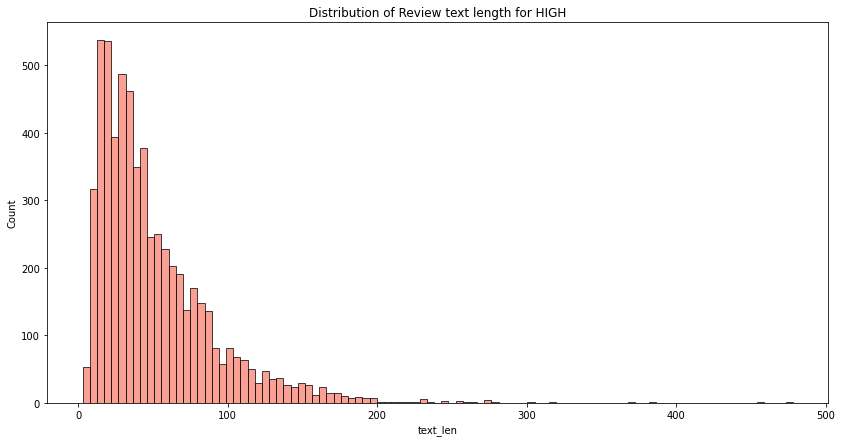

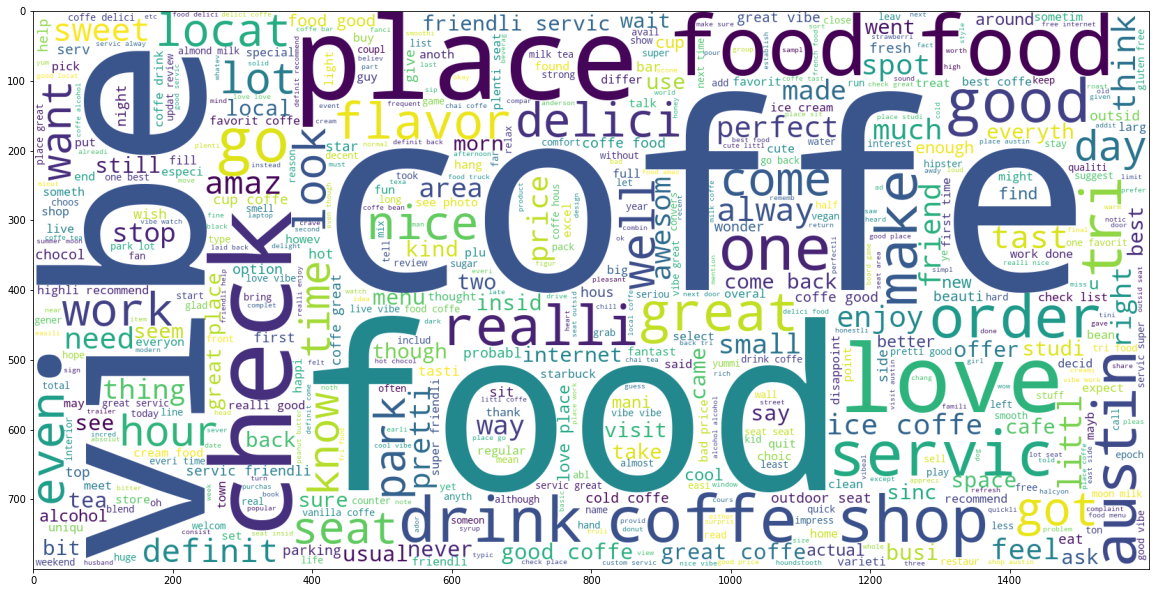

In [ ]:
plt.figure(figsize=(14,7))
sns.histplot(ks_df[ks_df["cat_rating"]=="HIGH"]["text_len"],color="salmon")
plt.title("Distribution of Review text length for HIGH")
display(ks_df.text_len[ks_df["cat_rating"]=="HIGH"].describe())


from wordcloud import WordCloud
plt.figure(figsize=(20,20))
wc = WordCloud(max_words=2000,min_font_size=10, height=800,width=1600,
               background_color="white").generate(" ".join(ks_df[ks_df["cat_rating"]=="HIGH"].text_clean))
plt.imshow(wc)

count    1460.000000
mean       60.212329
std        45.416903
min         2.000000
25%        28.000000
50%        48.000000
75%        78.250000
max       413.000000
Name: text_len, dtype: float64

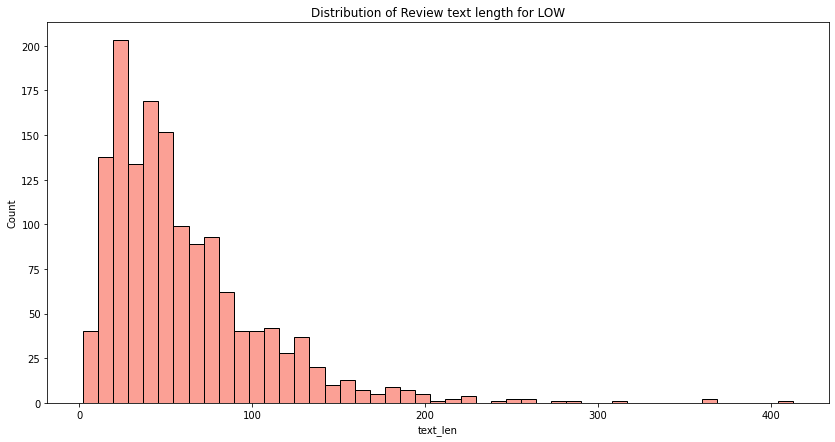

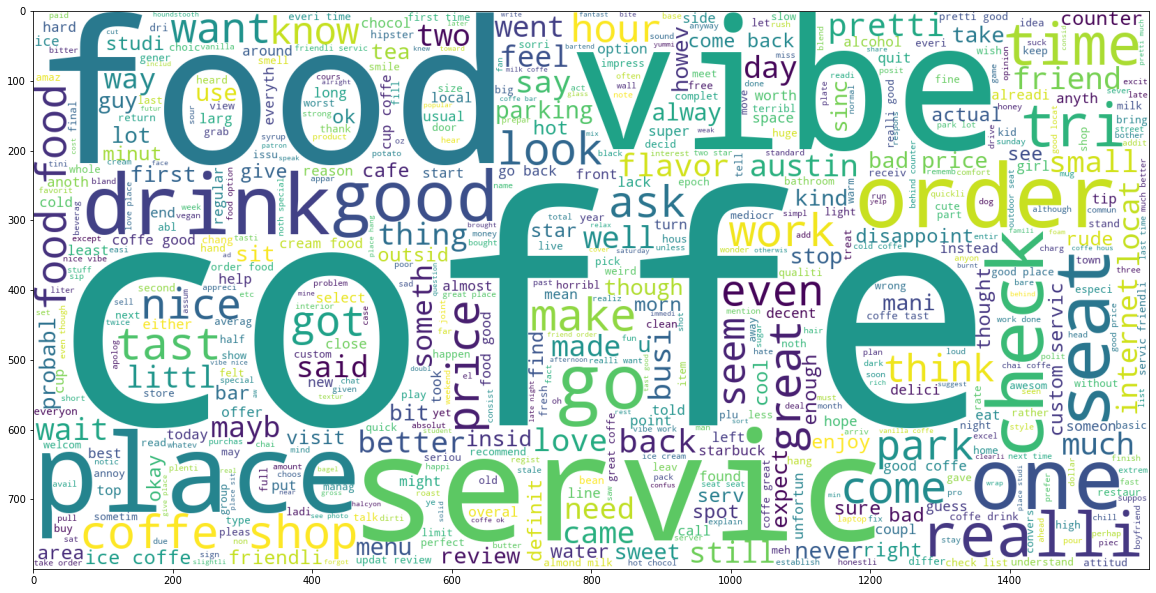

In [ ]:
plt.figure(figsize=(14,7))
sns.histplot(ks_df[ks_df["cat_rating"]=="LOW"]["text_len"],color="salmon")
plt.title("Distribution of Review text length for LOW")
display(ks_df.text_len[ks_df["cat_rating"]=="LOW"].describe())

from wordcloud import WordCloud
plt.figure(figsize=(20,20))
wc = WordCloud(max_words=2000,min_font_size=10, height=800,width=1600,
               background_color="white").generate(" ".join(ks_df[ks_df["cat_rating"]=="LOW"].text_clean))
plt.imshow(wc)

###Dataset word cloud

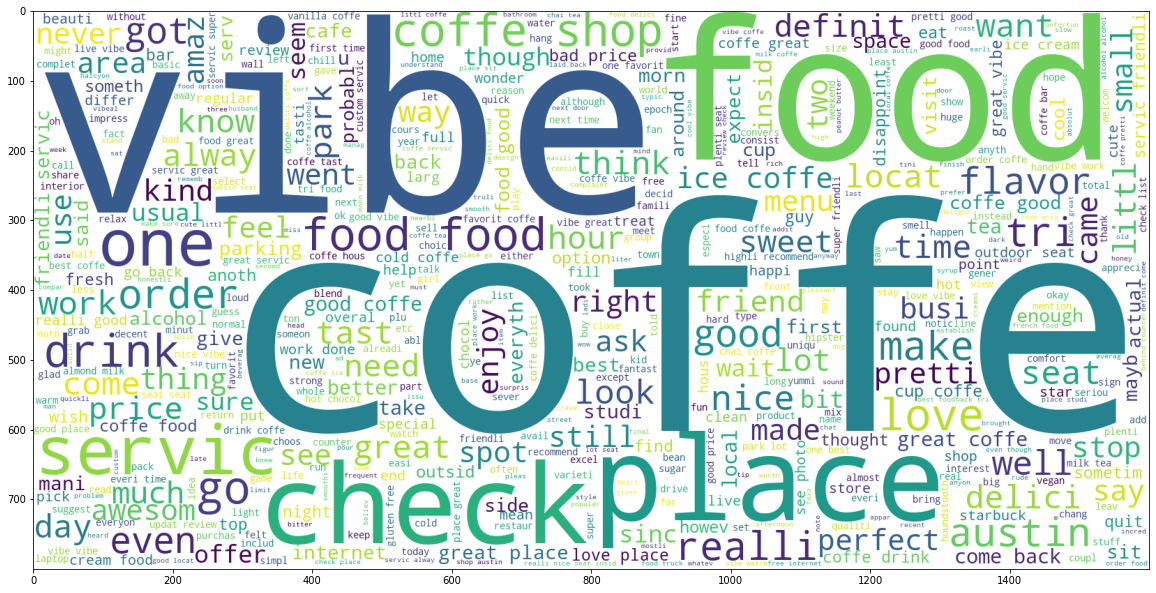

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
wc = WordCloud(max_words=2000,min_font_size=10, height=800,width=1600,
               background_color="white").generate(" ".join(ks_df.text_clean))
plt.imshow(wc)

# Data Preparation

In [ ]:
# import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# load the data set
data = pd.read_csv(path + '/ratings_and_sentiments UTF-8.csv')
  
# print info about columns in the dataframe
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7483 entries, 0 to 7482
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   coffee_shop_name  7483 non-null   object 
 1   review_text       7483 non-null   object 
 2   rating            7483 non-null   object 
 3   num_rating        7483 non-null   int64  
 4   cat_rating        7483 non-null   object 
 5   bool_HIGH         7483 non-null   int64  
 6   overall_sent      7483 non-null   int64  
 7   vibe_sent         4374 non-null   object 
 8   tea_sent          7483 non-null   int64  
 9   service_sent      7483 non-null   int64  
 10  seating_sent      7483 non-null   int64  
 11  price_sent        7483 non-null   int64  
 12  parking_sent      7483 non-null   object 
 13  location_sent     7483 non-null   int64  
 14  alcohol_sent      7483 non-null   int64  
 15  coffee_sent       7483 non-null   object 
 16  food_sent         7483 non-null   object 


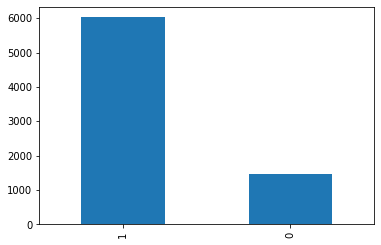

In [ ]:
data['bool_HIGH'].value_counts().plot.bar()

In [ ]:
len (data['bool_HIGH'])

7483

In [ ]:
data['bool_HIGH'].value_counts(1)

1    0.804891
0    0.195109
Name: bool_HIGH, dtype: float64

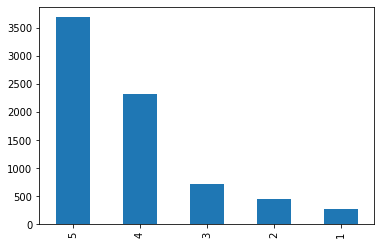

In [ ]:
data['num_rating'].value_counts().plot.bar()

In [ ]:
data_zip = list(zip(data['review_text'], data['coffee_shop_name']))
ros = RandomOverSampler(random_state=0, sampling_strategy=)
ros_x, ros_y = ros.fit_resample(data_zip,data['bool_HIGH'])

ros_data2 = [row[0] for row in ros_x]

ros_data = pd.DataFrame(list(zip(ros_data2, ros_y)),
               columns =['review_text', 'bool_HIGH'])

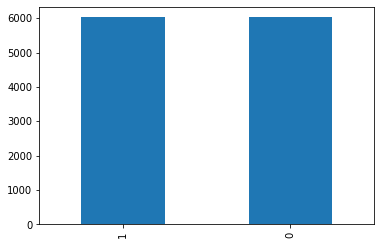

In [ ]:
ros_data['bool_HIGH'].value_counts().plot.bar()

In [ ]:
len (ros_data['bool_HIGH'])

12046

In [ ]:
print(ros_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12046 entries, 0 to 12045
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_text  12046 non-null  object
 1   bool_HIGH    12046 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 188.3+ KB
None


In [ ]:
ros_data.head()

,review_text,bool_HIGH
0,11/25/2016 1 check-in Love love loved the vib...,1
1,"12/2/2016 Listed in Date Night: Austin, vibe ...",1
2,11/30/2016 1 check-in Listed in food seating ...,1
3,11/25/2016 Very cool vibe! Good drinks Nice s...,0
4,12/3/2016 1 check-in They are location within...,1


In [ ]:
shop_score = pd.read_csv(path + '/sentiments_by_shop_avg.csv')
shop_score.head()

,coffee_shop_name,num_reviews,rating,avg_rating,coffee,tea,vibe,internet,food,alcohol,seating,service,parking,location,local,price,hours
0,Manana Coffee & Juice,33,4.848485,5,0.666667,0.030303,0.515152,0.0,0.212121,0.000000,0.212121,0.272727,0.000000,0.121212,-0.030303,-0.060606,0.060606
1,Brian's Brew,45,4.844444,5,0.888889,0.000000,0.044444,0.0,0.111111,0.000000,0.022222,0.222222,0.111111,0.022222,0.022222,0.000000,0.000000
2,Flitch Coffee,28,4.821429,5,0.571429,0.071429,0.464286,0.0,0.000000,0.000000,0.392857,0.285714,0.285714,0.035714,-0.035714,0.035714,0.000000
3,Third Coast Coffee Roasting Company,56,4.821429,5,0.750000,0.000000,0.160714,0.0,0.035714,0.035714,0.000000,0.214286,0.053571,0.035714,0.071429,0.178571,0.035714
4,Kowabunga Coffee,16,4.812500,5,0.062500,0.125000,0.000000,0.0,0.000000,0.000000,0.000000,0.437500,0.000000,0.187500,0.187500,0.000000,0.250000


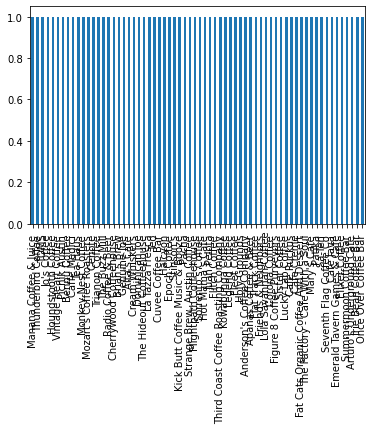

In [ ]:
shop_score['coffee_shop_name'][:66].value_counts().plot.bar()

# **Feature Extraction Method**


## **Wangchanberta** (Monolingual: Thai)

In [ ]:
# active GPU
device = torch.device("cuda")
torch.set_default_tensor_type('torch.cuda.FloatTensor')

# model loading
wangchan_tokenizer = AutoTokenizer.from_pretrained(f'airesearch/wangchanberta-base-att-spm-uncased', output_hidden_states=True)
wangchan_model = AutoModel.from_pretrained(f'airesearch/wangchanberta-base-att-spm-uncased', output_hidden_states=True)
wangchan_model = wangchan_model.to(device)

In [ ]:
def adjust_encoded_input_wangchan(encoded_input):

  # delete first and last separator token and splits to 414 tokens
  input_ids_chunks = list(encoded_input['input_ids'][0][1:-1].split(414))
  attention_mask_chunks = list(encoded_input['attention_mask'][0][1:-1].split(414))

  for i in range(len(input_ids_chunks)):

    # add 5 to the first and 6 to last element tonsor padding len to 512 for transformer model 
    input_ids_chunks[i] = torch.cat([input_ids_chunks[i], torch.Tensor([6, 5]).long() ])
    # shifting 6 5
    input_ids_chunks[i] = torch.roll(input_ids_chunks[i], 1, 0)
    
    # padding len to 416 for transformer model
    pad_len = 416 - input_ids_chunks[i].shape[0]

    # 1 token represents padding <pad>
    input_ids_chunks[i] = torch.cat([input_ids_chunks[i], torch.Tensor([1] * pad_len).long()])

    if len(attention_mask_chunks[i]) == 414:
      attention_mask_chunks[i] = torch.cat([attention_mask_chunks[i], torch.Tensor([1] * 2).long()])
    else:
      attention_mask_chunks[i] = torch.cat([attention_mask_chunks[i], torch.Tensor([1] * 2).long()])
      attention_mask_chunks[i] = torch.cat([attention_mask_chunks[i], torch.Tensor([0] * (pad_len)).long()])

  input_ids = torch.stack(input_ids_chunks)
  attention_mask = torch.stack(attention_mask_chunks)

  input_dict = {
      'input_ids': input_ids.long(),
      'attention_mask': attention_mask.int()
  }

  return input_dict

adjust_encoded_input_wangchan method ที่ช่วยจัดการ split word tokens ที่ยาวเกินให้มีขนาด 416 ส่วนที่เหลือจะถูกทำการ padding ด้วย 1 ในฝั่งของ wangchanberta

In [ ]:
# EXAMPLE
text = " 11/13/2016 Beautiful eccentric coffee shop with a library of peculiar books.  Swings, couches, and pillow corners for cuddle puddles.  Coffee with mint and ways you've never imagined coffee could be made. Try the matcha green tea with soy, creamiest matcha I've ever had.  First time here and already my favorite coffee bar so far. See all photos from Vicki Y. for The Factory - Cafe With a Soul "

encoded_input = wangchan_tokenizer(text, return_tensors='pt').to(device)
encoded_input = adjust_encoded_input_wangchan(encoded_input)
encoded_input['input_ids'], encoded_input['input_ids'].size()

(tensor([[    5,    10,   542,   101,   552,   101,  3018,    10,     3,   292,
           5136,  2657, 21002,    10,  8701, 12278, 15887,    10, 21544,    10,
           5957,    10,  2659,    10,   205,    10,  3248,  9578,  3459,    10,
            607,    10,  3165, 22177,   361,  3887,    10,  9946,   110,    11,
             10,     3, 20558,   110,    14,    10,  1189, 18210,  2829,    14,
             10,  1392,    10,  3234, 22910,    10, 10365,  8341,   110,    10,
           1690,    10,  8700, 14381,  1344,    10,  5762, 14381,  9627,    11,
             10,     3, 10263,  6047,    10,  2659,    10,  4627,   302,    10,
           1392,    10,  6974,   110,    10,  1747,   146,  4713,    10, 21983,
          10904, 14901,   451,  1579,    10, 21544,    10,  1189,  7201,   341,
             10,  1811,    10, 17508,    11,    10,     3,  3459,    10,   293,
             10, 21797,   205,    10, 13800,    10, 16116,    10,  2659,    10,
           2832,   610,    14,    10, 16

In [ ]:
ros_data.iloc[1]

review_text     12/2/2016 Listed in Date Night: Austin, vibe ...
bool_HIGH                                                      1
Name: 1, dtype: object

In [ ]:
ks_df.iloc[0]['review_text']

' 11/25/2016 1 check-in Love love loved the vibe! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha coffee, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to alcohol, desired level of sweetness, and a checkout system. I got my coffee within minutes!  I was hoping for a typical heart or feather on my coffee, but found myself listing out all the possibilities of what the vibe may be. Any ideas? '

In [ ]:
text = ks_df.iloc[0]['review_text']

encoded_input = wangchan_tokenizer(text, return_tensors='pt').to(device)
encoded_input = adjust_encoded_input_wangchan(encoded_input)
encoded_input['input_ids'], encoded_input['input_ids'].size()

(tensor([[    5,    10,   542,   101,   570,   101,  3018,    10,    59,    10,
          22197,    35,   451,    10,     3,   743,  4713,    10,  3421,    10,
           3421,   341,    10,   293,    10,  3144,  1811,   122,    10,     3,
          22876,    10, 10365,  8341,    10,   607,    10,   293,    10, 21544,
             10,  5957,    10, 20857,    10, 20551,    10, 20338,    10, 12383,
             14,    10,  1392,    10, 16944,    10,  2883,   875,    10,   110,
          20558,   110,  1525,    10,     3,    10, 14198,  1579,    10,   293,
             10, 21797,   205,    10, 21544,    14,    10,  1392,    10,  1357,
             10,  9780,    10,  5437,   610,    10,  9181,  2305,   110,  2657,
           1189,   122,    10,     3,   823,  8590,   919,    10,  1392,    10,
           7523, 10372,    10,  2434,    10,  7133, 19936,    10,  2883,   875,
             10,  6758,   302,  6337,    10, 24063,  2197,   341,    11,    10,
              3,    10, 14198,  1579,   

In [ ]:
import copy

def extract_last_four_with_wangchan(input_text, feature_extractor):

  encoded_input = wangchan_tokenizer(input_text, return_tensors='pt').to(device)
  encoded_input = adjust_encoded_input_wangchan(encoded_input)
  _, _, hidden_states = feature_extractor(**encoded_input)

  # use only last 4 layers 
  last_four_layers = [hidden_states[i] for i in (-1, -2, -3, -4)]

  # concat last 4 layers vectors then calculate mean between vectors
  cat_hidden_states = torch.cat(tuple(last_four_layers), dim=-1)
  cat_sentence_embedding = torch.mean(cat_hidden_states, dim=1).squeeze()

  # if document only has 1 batch, no need to sum vector
  if cat_sentence_embedding.shape[0] != 3072:

    doc_embedding = torch.sum(cat_sentence_embedding, dim=0)
  else:
    doc_embedding = copy.copy(cat_sentence_embedding)
  
  return doc_embedding.cpu().detach().numpy().astype('float64')

We can use the outputs of WangchanBERTa (or any transformer-based models) as document vectors as an example by [BramVanroy](https://github.com/BramVanroy/bert-for-inference/blob/master/introduction-to-bert.ipynb).

![](https://github.com/BramVanroy/bert-for-inference/raw/ab7c57d6e7c79faf83ac0f9b6595c4b3d660c43c/img/bert-feature-extraction-contextualized-embeddings.png)

In [ ]:
text = "11/13/2016 Beautiful eccentric coffee shop with a library of peculiar books.  Swings, couches, and pillow corners for cuddle puddles.  Coffee with mint and ways you've never imagined coffee could be made. Try the matcha green tea with soy, creamiest matcha I've ever had.  First time here and already my favorite coffee bar so far. See all photos from Vicki Y. for The Factory - Cafe With a Soul"

t_2 = extract_last_four_with_wangchan(text, wangchan_model)
t_2

array([-0.23159732, -0.88206249,  0.79564559, ...,  0.09885177,
        0.21537103,  0.00683422])

In [ ]:
len(t_2)

3072

##  **BERT**

In [ ]:
from transformers import BertTokenizer, BertModel, BertForSequenceClassification
import torch
import gc

device = torch.device("cuda")
torch.set_default_tensor_type('torch.cuda.FloatTensor')

bert_tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
bert_model = BertModel.from_pretrained("bert-base-multilingual-cased", output_hidden_states=True)
bert_model = bert_model.to(device)
# bert_class = BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased")

Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/714M [00:00<?, ?B/s]

In [ ]:
a = torch.Tensor([102, 101]).long()
c = torch.Tensor([1] * 2).long()
def adjust_encoded_input(encoded_input):

  # delete first and last separator token and splits to 510 tokens
  input_ids_chunks = list(encoded_input['input_ids'][0][1:-1].split(510))
  attention_mask_chunks = list(encoded_input['attention_mask'][0][1:-1].split(510))

  for i in range(len(input_ids_chunks)):

    # add 101 to the first and 102 to last element tonsor padding len to 512 for transformer model 
    input_ids_chunks[i] = torch.cat([input_ids_chunks[i], a ])
    # shifting 101 102
    input_ids_chunks[i] = torch.roll(input_ids_chunks[i], 1, 0)
    
    # padding len to 512 for transformer model
    pad_len = 512 - input_ids_chunks[i].shape[0]
    b = torch.Tensor([0] * pad_len).long()

    input_ids_chunks[i] = torch.cat([input_ids_chunks[i], b])

    if len(attention_mask_chunks[i]) == 510:
      attention_mask_chunks[i] = torch.cat([attention_mask_chunks[i], c])
    else:
      d = torch.Tensor([0] * (pad_len)).long()
      attention_mask_chunks[i] = torch.cat([attention_mask_chunks[i], c])
      attention_mask_chunks[i] = torch.cat([attention_mask_chunks[i], d])

  input_ids = torch.stack(input_ids_chunks)
  attention_mask = torch.stack(attention_mask_chunks)

  input_dict = {
      'input_ids': input_ids.long(),
      'attention_mask': attention_mask.int()
  }

  return input_dict

method ที่ช่วยจัดการ split word tokens ที่ยาวเกินให้มีขนาด 512 ส่วนที่เหลือจะถูกทำการ padding ด้วย 0 ในฝั่งของ bert

In [ ]:
text = "11/13/2016 Beautiful eccentric coffee shop with a library of peculiar books.  Swings, couches, and pillow corners for cuddle puddles.  Coffee with mint and ways you've never imagined coffee could be made. Try the matcha green tea with soy, creamiest matcha I've ever had.  First time here and already my favorite coffee bar so far. See all photos from Vicki Y. for The Factory - Cafe With a Soul"

encoded_input = bert_tokenizer(text, return_tensors='pt').to(device)
encoded_input = adjust_encoded_input(encoded_input)
encoded_input['input_ids'], encoded_input['input_ids'].size()

(tensor([[   101,  10193,    120,  10249,    120,  10255,  26820,  55966,  11405,
           18570,  69954,  39090,  10169,    169,  23187,  10108,  98018,  15174,
             119,  53314,  10107,    117,  95930,  10107,    117,  10111,  24109,
           13660,  10874,  33625,  10107,  10142,  10854,  73182,  34597,  73182,
           10107,    119,  69868,  10169,  14702,  10111,  30360,  13028,    112,
           10323,  14794,  13872,  32994,  10162,  69954,  12174,  10347,  11019,
             119,  99695,  10105,  12356,  10113,  23320,  57675,  10169, 103559,
             117,  93461,  66820,  12356,  10113,    146,    112,  10323,  17038,
           10374,    119,  12128,  10635,  19353,  10111,  19034,  15127,  55768,
           69954,  18121,  10380,  13301,    119,  13924,  10435,  41833,  10188,
           39574,  10506,    162,    119,  10142,  10117,  35231,    118,  68903,
           12613,    169,  19723,    102,      0,      0,      0,      0,      0,
               0

In [ ]:
import copy

def extract_last_four_with_bert(input_text, feature_extractor):
  encoded_input = bert_tokenizer(input_text, return_tensors='pt').to(device)
  encoded_input = adjust_encoded_input(encoded_input)
  # hidden_states = feature_extractor(**encoded_input)[0]
  _, _, hidden_states = feature_extractor(**encoded_input)

  # FOR MEAN CALCULATION BETWEEN TENSOR DIMENSION

  last_four_layers = [hidden_states[i] for i in (-1, -2, -3, -4)]

  cat_hidden_states = torch.cat(tuple(last_four_layers), dim=-1)
  cat_sentence_embedding = torch.mean(cat_hidden_states, dim=1).squeeze()

  if cat_sentence_embedding.shape[0] != 3072:

    doc_embedding = torch.sum(cat_sentence_embedding, dim=0)
  else:
    doc_embedding = copy.copy(cat_sentence_embedding)

  return doc_embedding.cpu().detach().numpy().astype('float64')

In [ ]:
text = "11/13/2016 Beautiful eccentric coffee shop with a library of peculiar books.  Swings, couches, and pillow corners for cuddle puddles.  Coffee with mint and ways you've never imagined coffee could be made. Try the matcha green tea with soy, creamiest matcha I've ever had.  First time here and already my favorite coffee bar so far. See all photos from Vicki Y. for The Factory - Cafe With a Soul"

t_2 = extract_last_four_with_bert(text, bert_model)
t_2

array([-0.12745339,  0.25036067,  0.4242878 , ...,  0.69231588,
       -0.08589587,  0.3151257 ])

In [ ]:
 len(t_2)

3072

หลังจากประกาศตัวแปรใหม่ใน Data Preparation ให้ทำการ Extract ข้อมูลทั้งหมด

  ## **Roberta**

In [ ]:
# active GPU
device = torch.device("cuda")
torch.set_default_tensor_type('torch.cuda.FloatTensor')

from transformers import RobertaTokenizer, RobertaModel
import torch
import gc
Roberta_tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
Roberta_model = RobertaModel.from_pretrained("roberta-base", output_hidden_states=True)
Roberta_model = Roberta_model.to(device)


Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

In [ ]:
a = torch.Tensor([102, 101]).long()
c = torch.Tensor([1] * 2).long()
def adjust_encoded_input_roberta(encoded_input):

  # delete first and last separator token and splits to 510 tokens
  input_ids_chunks = list(encoded_input['input_ids'][0][1:-1].split(510))
  attention_mask_chunks = list(encoded_input['attention_mask'][0][1:-1].split(510))

  for i in range(len(input_ids_chunks)):

    # add 101 to the first and 102 to last element tonsor padding len to 512 for transformer model 
    input_ids_chunks[i] = torch.cat([input_ids_chunks[i], a ])
    # shifting 101 102
    input_ids_chunks[i] = torch.roll(input_ids_chunks[i], 1, 0)
    
    # padding len to 512 for transformer model
    pad_len = 512 - input_ids_chunks[i].shape[0]
    b = torch.Tensor([0] * pad_len).long()

    input_ids_chunks[i] = torch.cat([input_ids_chunks[i], b])

    if len(attention_mask_chunks[i]) == 510:
      attention_mask_chunks[i] = torch.cat([attention_mask_chunks[i], c])
    else:
      d = torch.Tensor([0] * (pad_len)).long()
      attention_mask_chunks[i] = torch.cat([attention_mask_chunks[i], c])
      attention_mask_chunks[i] = torch.cat([attention_mask_chunks[i], d])

  input_ids = torch.stack(input_ids_chunks)
  attention_mask = torch.stack(attention_mask_chunks)

  input_dict = {
      'input_ids': input_ids.long(),
      'attention_mask': attention_mask.int()
  }

  return input_dict

In [ ]:
text = "11/13/2016 Beautiful eccentric coffee shop with a library of peculiar books.  Swings, couches, and pillow corners for cuddle puddles.  Coffee with mint and ways you've never imagined coffee could be made. Try the matcha green tea with soy, creamiest matcha I've ever had.  First time here and already my favorite coffee bar so far. See all photos from Vicki Y. for The Factory - Cafe With a Soul"

encoded_input = Roberta_tokenizer(text, return_tensors='pt').to(device)
encoded_input = adjust_encoded_input_roberta(encoded_input)
encoded_input['input_ids'], encoded_input['input_ids'].size()

(tensor([[  101,  1225,    73,  1558,    73,  9029, 20081, 29555,  3895,  2792,
             19,    10,  5560,     9, 28178,  2799,     4,  1437,  3323,  1033,
              6, 15763,  5559,     6,     8, 26410, 12078,    13,   740, 20885,
            181,  7027,  1634,     4,  1437, 12596,    19, 19109,     8,  1319,
             47,   348,   393, 14838,  3895,   115,    28,   156,     4, 11087,
              5,   914,   102,  2272,  6845,    19,  9092,     6,  8633,  5602,
            990,   914,   102,    38,   348,   655,    56,     4,  1437,  1234,
             86,   259,     8,   416,   127,  2674,  3895,  2003,    98,   444,
              4,  4250,    70,  2356,    31, 18889,   118,   854,     4,    13,
             20, 16810,   111, 16542,   590,    10, 16455,   102,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,   

In [ ]:
import copy

def extract_last_four_with_roberta(input_text, feature_extractor):

  encoded_input = Roberta_tokenizer(input_text, return_tensors='pt').to(device)
  encoded_input = adjust_encoded_input_roberta(encoded_input)
  _, _, hidden_states = feature_extractor(**encoded_input)

  # use only last 4 layers 
  last_four_layers = [hidden_states[i] for i in (-1, -2, -3, -4)]

  # concat last 4 layers vectors then calculate mean between vectors
  cat_hidden_states = torch.cat(tuple(last_four_layers), dim=-1)
  cat_sentence_embedding = torch.mean(cat_hidden_states, dim=1).squeeze()

  # if document only has 1 batch, no need to sum vector
  if cat_sentence_embedding.shape[0] != 3072:

    doc_embedding = torch.sum(cat_sentence_embedding, dim=0)
  else:
    doc_embedding = copy.copy(cat_sentence_embedding)
  
  return doc_embedding.cpu().detach().numpy().astype('float64')

In [ ]:
text = "11/13/2016 Beautiful eccentric coffee shop with a library of peculiar books.  Swings, couches, and pillow corners for cuddle puddles.  Coffee with mint and ways you've never imagined coffee could be made. Try the matcha green tea with soy, creamiest matcha I've ever had.  First time here and already my favorite coffee bar so far. See all photos from Vicki Y. for The Factory - Cafe With a Soul"

t_2 = extract_last_four_with_roberta(text, Roberta_model)
t_2

array([-0.0651315 ,  0.07575117, -0.0209062 , ...,  0.18697056,
        0.06941102, -0.06865767])

In [ ]:
len(t_2)

3072

##**ALBERT**

In [ ]:
# active GPU
device = torch.device("cuda")
torch.set_default_tensor_type('torch.cuda.FloatTensor')

from transformers import AlbertTokenizer, AlbertModel, AlbertConfig
import torch
import gc
albert_tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')
albert_model = AlbertModel.from_pretrained('albert-base-v2', output_hidden_states=True)
albert_model = albert_model.to(device)

Downloading:   0%|          | 0.00/760k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/684 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/47.4M [00:00<?, ?B/s]

In [ ]:
a = torch.Tensor([102, 101]).long()
c = torch.Tensor([1] * 2).long()
def adjust_encoded_input_albert(encoded_input):

  # delete first and last separator token and splits to 510 tokens
  input_ids_chunks = list(encoded_input['input_ids'][0][1:-1].split(510))
  attention_mask_chunks = list(encoded_input['attention_mask'][0][1:-1].split(510))

  for i in range(len(input_ids_chunks)):

    # add 101 to the first and 102 to last element tonsor padding len to 512 for transformer model 
    input_ids_chunks[i] = torch.cat([input_ids_chunks[i], a ])
    # shifting 101 102
    input_ids_chunks[i] = torch.roll(input_ids_chunks[i], 1, 0)
    
    # padding len to 512 for transformer model
    pad_len = 512 - input_ids_chunks[i].shape[0]
    b = torch.Tensor([0] * pad_len).long()

    input_ids_chunks[i] = torch.cat([input_ids_chunks[i], b])

    if len(attention_mask_chunks[i]) == 510:
      attention_mask_chunks[i] = torch.cat([attention_mask_chunks[i], c])
    else:
      d = torch.Tensor([0] * (pad_len)).long()
      attention_mask_chunks[i] = torch.cat([attention_mask_chunks[i], c])
      attention_mask_chunks[i] = torch.cat([attention_mask_chunks[i], d])

  input_ids = torch.stack(input_ids_chunks)
  attention_mask = torch.stack(attention_mask_chunks)

  input_dict = {
      'input_ids': input_ids.long(),
      'attention_mask': attention_mask.int()
  }

  return input_dict

In [ ]:
text = "11/13/2016 Beautiful eccentric coffee shop with a library of peculiar books.  Swings, couches, and pillow corners for cuddle puddles.  Coffee with mint and ways you've never imagined coffee could be made. Try the matcha green tea with soy, creamiest matcha I've ever had.  First time here and already my favorite coffee bar so far. See all photos from Vicki Y. for The Factory - Cafe With a Soul"

encoded_input = albert_tokenizer(text, return_tensors='pt').to(device)
encoded_input = adjust_encoded_input_albert(encoded_input)
encoded_input['input_ids'], encoded_input['input_ids'].size()

(tensor([[  101,   547, 11698,  9280,  4508,  1632, 15632,  2364,  2546,    29,
             21,  1248,    16, 13193,   964,     9,  5587,    18,    15,  4914,
            160,    15,    17,  7633,  8894,    26, 28428, 23271,    18,     9,
           2364,    29,  9728,    17,  2847,    42,    22,   195,   243,  7827,
           2364,   110,    44,   117,     9,  1131,    14,   730,    58,   647,
           3276,    29,    86,    93,    15,  5262, 10727,   730,    58,    31,
             22,   195,   462,    41,     9,    64,    85,   235,    17,   614,
             51,  3839,  2364,   748,    86,   463,     9,   196,    65,  7064,
             37, 24014,    13,    93,     9,    26,    14,  3129,    13,     8,
           6241,    29,    21,  2069,   102,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
              0,     0,     0,     0,   

In [ ]:
import copy

def extract_last_four_with_albert(input_text, feature_extractor):

  encoded_input = albert_tokenizer(input_text, return_tensors='pt').to(device)
  encoded_input = adjust_encoded_input_albert(encoded_input)
  _, _, hidden_states = feature_extractor(**encoded_input)

  # use only last 4 layers 
  last_four_layers = [hidden_states[i] for i in (-1, -2, -3, -4)]

  # concat last 4 layers vectors then calculate mean between vectors
  cat_hidden_states = torch.cat(tuple(last_four_layers), dim=-1)
  cat_sentence_embedding = torch.mean(cat_hidden_states, dim=1).squeeze()

  # if document only has 1 batch, no need to sum vector
  if cat_sentence_embedding.shape[0] != 3072:

    doc_embedding = torch.sum(cat_sentence_embedding, dim=0)
  else:
    doc_embedding = copy.copy(cat_sentence_embedding)
  
  return doc_embedding.cpu().detach().numpy().astype('float64')

In [ ]:
text = "11/13/2016 Beautiful eccentric coffee shop with a library of peculiar books.  Swings, couches, and pillow corners for cuddle puddles.  Coffee with mint and ways you've never imagined coffee could be made. Try the matcha green tea with soy, creamiest matcha I've ever had.  First time here and already my favorite coffee bar so far. See all photos from Vicki Y. for The Factory - Cafe With a Soul"

t_2 = extract_last_four_with_albert(text, albert_model)
t_2

array([-0.88121927, -0.68511128,  1.50038958, ...,  0.78581107,
       -0.5496434 , -0.00418578])

ประกาศตัวแปรใหม่

In [ ]:
ks_da_df = pd.read_csv(path + '/ratings_and_sentiments UTF-8.csv')
#ks_df = pd.read_csv(path + '/sentiments_by_shop.csv')

In [ ]:
ros_data.head()

,review_text,bool_HIGH
0,11/25/2016 1 check-in Love love loved the vib...,1
1,"12/2/2016 Listed in Date Night: Austin, vibe ...",1
2,11/30/2016 1 check-in Listed in food seating ...,1
3,11/25/2016 Very cool vibe! Good drinks Nice s...,0
4,12/3/2016 1 check-in They are location within...,1


# Extract last four Model

In [ ]:
albert_vectors = []

bert_vectors = []

roberta_vectors = []


#df_pos = ks_da_df[ks_da_df['bool_HIGH']]



for idx, row in ros_data.iterrows():

  text = row['review_text']


  albert_vector = extract_last_four_with_albert(text, albert_model)

  bert_vector = extract_last_four_with_bert(text, bert_model)

  roberta_vector = extract_last_four_with_roberta(text, Roberta_model)

  albert_vectors.append(albert_vector)

  bert_vectors.append(bert_vector)

  roberta_vectors.append(roberta_vector)

  print(idx)


ros_data['content_bert_vector'] = bert_vectors

ros_data['content_albert_vector'] = albert_vectors

ros_data['content_roberta_vector'] = roberta_vectors

ros_data.to_pickle("/content/drive/MyDrive/Colab Notebooks/NLP_ITM/Research/ratings_and_sentiments UTF-8.pkl")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133


Token indices sequence length is longer than the specified maximum sequence length for this model (564 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (605 > 512). Running this sequence through the model will result in indexing errors


134
135


Token indices sequence length is longer than the specified maximum sequence length for this model (545 > 512). Running this sequence through the model will result in indexing errors


Streaming output truncated to the last 5000 lines.
7046
7047
7048
7049
7050
7051
7052
7053
7054
7055
7056
7057
7058
7059
7060
7061
7062
7063
7064
7065
7066
7067
7068
7069
7070
7071
7072
7073
7074
7075
7076
7077
7078
7079
7080
7081
7082
7083
7084
7085
7086
7087
7088
7089
7090
7091
7092
7093
7094
7095
7096
7097
7098
7099
7100
7101
7102
7103
7104
7105
7106
7107
7108
7109
7110
7111
7112
7113
7114
7115
7116
7117
7118
7119
7120
7121
7122
7123
7124
7125
7126
7127
7128
7129
7130
7131
7132
7133
7134
7135
7136
7137
7138
7139
7140
7141
7142
7143
7144
7145
7146
7147
7148
7149
7150
7151
7152
7153
7154
7155
7156
7157
7158
7159
7160
7161
7162
7163
7164
7165
7166
7167
7168
7169
7170
7171
7172
7173
7174
7175
7176
7177
7178
7179
7180
7181
7182
7183
7184
7185
7186
7187
7188
7189
7190
7191
7192
7193
7194
7195
7196
7197
7198
7199
7200
7201
7202
7203
7204
7205
7206
7207
7208
7209
7210
7211
7212
7213
7214
7215
7216
7217
7218
7219
7220
7221
7222
7223
7224
7225
7226
7227
7228
7229
7230
7231
7232
7233
7234
7235

# **Predictive Model : Transformer-based Models**

##Import saved file from pickle

In [ ]:
import pickle

ros_data = pickle.load( open( "/content/drive/MyDrive/Colab Notebooks/NLP_ITM/Research/ratings_and_sentiments UTF-8.pkl", "rb"))

## Logistic Classifier (BERT, ALBERT, RoBERTa)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

###Grid Search - Logistic Regression

In [ ]:
LR_parameters ={
    'C': [10,20,30]}  

In [ ]:
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support , classification_report
from sklearn.model_selection import GridSearchCV

is_manual = True

# loop data df
for i in task:

  col = task[i]['col']
  X = list(task[i]['data'][col])
  y = list(task[i]['data']['bool_HIGH'])

  X_test = list(ks_df_test[col])
  y_test = list(ks_df_test['bool_HIGH'])

  max_num_iter = 520

  if is_manual:
    clf = LogisticRegression()
    model = GridSearchCV(clf, param_grid=LR_parameters, cv=4, scoring='accuracy',error_score=0, n_jobs=-1)
    model.fit(X, y)
    predictionforest = model.best_estimator_.predict(X_test)
    
    print(confusion_matrix(y_test,predictionforest))
    print(classification_report(y_test,predictionforest,digits = 4))

/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[[1147  110]
 [ 162  991]]
              precision    recall  f1-score   support

           0     0.8762    0.9125    0.8940      1257
           1     0.9001    0.8595    0.8793      1153

    accuracy                         0.8871      2410
   macro avg     0.8882    0.8860    0.8867      2410
weighted avg     0.8877    0.8871    0.8870      2410



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[[1144  113]
 [ 192  961]]
              precision    recall  f1-score   support

           0     0.8563    0.9101    0.8824      1257
           1     0.8948    0.8335    0.8630      1153

    accuracy                         0.8734      2410
   macro avg     0.8755    0.8718    0.8727      2410
weighted avg     0.8747    0.8734    0.8731      2410



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[[1164   93]
 [ 118 1035]]
              precision    recall  f1-score   support

           0     0.9080    0.9260    0.9169      1257
           1     0.9176    0.8977    0.9075      1153

    accuracy                         0.9124      2410
   macro avg     0.9128    0.9118    0.9122      2410
weighted avg     0.9125    0.9124    0.9124      2410



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###Random Search - Logistic Regression

In [ ]:
 %%time
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support , classification_report
from sklearn.model_selection import RandomizedSearchCV

is_manual = True

# loop data df
for i in task:

  col = task[i]['col']
  X = list(task[i]['data'][col])
  y = list(task[i]['data']['bool_HIGH'])

  X_test = list(ks_df_test[col])
  y_test = list(ks_df_test['bool_HIGH'])

  max_num_iter = 520

  if is_manual:
    clf = LogisticRegression()
    model = RandomizedSearchCV(clf, LR_parameters, n_iter = 10, cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
    model.fit(X, y)
    predictionforest = model.best_estimator_.predict(X_test)
    print(confusion_matrix(y_test,predictionforest))
    print(classification_report(y_test,predictionforest,digits = 4))
    

Fitting 4 folds for each of 3 candidates, totalling 12 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[[1147  110]
 [ 162  991]]
              precision    recall  f1-score   support

           0     0.8762    0.9125    0.8940      1257
           1     0.9001    0.8595    0.8793      1153

    accuracy                         0.8871      2410
   macro avg     0.8882    0.8860    0.8867      2410
weighted avg     0.8877    0.8871    0.8870      2410

Fitting 4 folds for each of 3 candidates, totalling 12 fits


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[[1144  113]
 [ 192  961]]
              precision    recall  f1-score   support

           0     0.8563    0.9101    0.8824      1257
           1     0.8948    0.8335    0.8630      1153

    accuracy                         0.8734      2410
   macro avg     0.8755    0.8718    0.8727      2410
weighted avg     0.8747    0.8734    0.8731      2410

Fitting 4 folds for each of 3 candidates, totalling 12 fits


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[[1164   93]
 [ 118 1035]]
              precision    recall  f1-score   support

           0     0.9080    0.9260    0.9169      1257
           1     0.9176    0.8977    0.9075      1153

    accuracy                         0.9124      2410
   macro avg     0.9128    0.9118    0.9122      2410
weighted avg     0.9125    0.9124    0.9124      2410

CPU times: user 1min, sys: 15.1 s, total: 1min 15s
Wall time: 2min 16s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model.best_params_

{'C': 20}

###Defaut parameter - Logistic Regression

In [ ]:
ks_selected_df = ros_data

# train test spilt 80/20 ratio
ks_df_train, ks_df_test, ks_df_y_train, ks_df_y_test = train_test_split(ks_selected_df, list(ks_selected_df['bool_HIGH']), test_size=0.2, random_state=0)

task = {
    "ks_df": {
        'data': ks_df_train,
        'col': 'content_bert_vector',
        'language_model' : 'BERT (LR)'
    },
    "kh_df": {
        'data': ks_df_train,
        'col': 'content_albert_vector',
        'language_model' : 'ALBERT (LR)'
    },
   "ka_df": {
        'data': ks_df_train,
        'col': 'content_roberta_vector',
        'language_model' : 'RoBERTa (LR)'
         },
}

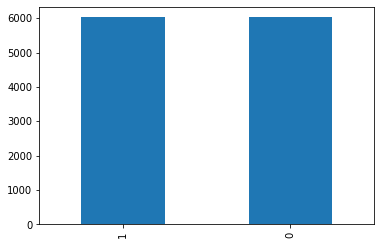

In [ ]:
ks_selected_df['bool_HIGH'].value_counts().plot.bar()

In [ ]:
len (ks_selected_df['bool_HIGH'])

12046

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support , classification_report

is_manual = True

# loop data df
for i in task:

  col = task[i]['col']
  X = list(task[i]['data'][col])
  y = list(task[i]['data']['bool_HIGH'])

  X_test = list(ks_df_test[col])
  y_test = list(ks_df_test['bool_HIGH'])

  max_num_iter = 520

  if is_manual:

    logreg_model = LogisticRegression(max_iter=max_num_iter, random_state=0,multi_class='multinomial')
    
    logreg_model.fit(X, y)
    y_pred = logreg_model.predict(X_test)
    print(task[i]['language_model'])
    print(classification_report(y_pred, y_test, digits = 4))

    print('\n')

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


BERT (LR)
              precision    recall  f1-score   support

           0     0.9634    0.8997    0.9305      1346
           1     0.8829    0.9568    0.9184      1064

    accuracy                         0.9249      2410
   macro avg     0.9232    0.9282    0.9244      2410
weighted avg     0.9279    0.9249    0.9251      2410





/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ALBERT (LR)
              precision    recall  f1-score   support

           0     0.9865    0.8769    0.9285      1414
           1     0.8491    0.9829    0.9111       996

    accuracy                         0.9207      2410
   macro avg     0.9178    0.9299    0.9198      2410
weighted avg     0.9297    0.9207    0.9213      2410



RoBERTa (LR)
              precision    recall  f1-score   support

           0     0.9499    0.9249    0.9372      1291
           1     0.9159    0.9437    0.9296      1119

    accuracy                         0.9336      2410
   macro avg     0.9329    0.9343    0.9334      2410
weighted avg     0.9341    0.9336    0.9337      2410





/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##Random Forest Clasiifier (BERT, ALBERT, RoBERTa)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
ks_selected_df = ros_data

# train test spilt 80/20 ratio
ks_df_train, ks_df_test, ks_df_y_train, ks_df_y_test = train_test_split(ks_selected_df, list(ks_selected_df['bool_HIGH']), test_size=0.2, random_state=0)

task2 = {
    "ks_df": {
        'data': ks_df_train,
        'col': 'content_bert_vector',
        'language_model' : 'BERT (RF)'
    },
    "kh_df": {
        'data': ks_df_train,
        'col': 'content_albert_vector',
        'language_model' : 'ALBERT (RF)'
    },
   "ka_df": {
        'data': ks_df_train,
        'col': 'content_roberta_vector',
        'language_model' : 'RoBERTa (RF)'
         },
}

###Grid Search - Random Forest

In [ ]:
Full_parameters ={
      'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
      'criterion' : ['gini', 'entropy'],
      'max_features': [0.3,0.5,0.7,0.9],
      'min_samples_leaf': [3,5,7,10,15],
      'min_samples_split': [2,5,10],
      'n_estimators': [50,100,200,400,600]} 

In [ ]:
RF_parameters ={
    'max_depth': [15,25],
    'min_samples_split': [5,10],
    'n_estimators': [200]}

In [ ]:
 %%time
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support , classification_report
from sklearn.model_selection import GridSearchCV

is_manual = True

# loop data df
for i in task2:

  col = task2[i]['col']
  X = list(task2[i]['data'][col])
  y = list(task2[i]['data']['bool_HIGH'])

  X_test = list(ks_df_test[col])
  y_test = list(ks_df_test['bool_HIGH'])

  max_num_iter = 520

  if is_manual:
    clf = RandomForestClassifier()
    model = GridSearchCV(clf, RF_parameters, cv=4, scoring='accuracy',n_jobs=-1)
    model.fit(X, y)
    predictionforest = model.best_estimator_.predict(X_test)
    print(confusion_matrix(y_test,predictionforest))
    print(classification_report(y_test,predictionforest,digits = 4))


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[[1244   13]
 [  50 1103]]
              precision    recall  f1-score   support

           0     0.9614    0.9897    0.9753      1257
           1     0.9884    0.9566    0.9722      1153

    accuracy                         0.9739      2410
   macro avg     0.9749    0.9731    0.9738      2410
weighted avg     0.9743    0.9739    0.9738      2410



/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[[1246   11]
 [  35 1118]]
              precision    recall  f1-score   support

           0     0.9727    0.9912    0.9819      1257
           1     0.9903    0.9696    0.9798      1153

    accuracy                         0.9809      2410
   macro avg     0.9815    0.9804    0.9809      2410
weighted avg     0.9811    0.9809    0.9809      2410



/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[[1253    4]
 [  25 1128]]
              precision    recall  f1-score   support

           0     0.9804    0.9968    0.9886      1257
           1     0.9965    0.9783    0.9873      1153

    accuracy                         0.9880      2410
   macro avg     0.9885    0.9876    0.9879      2410
weighted avg     0.9881    0.9880    0.9880      2410

CPU times: user 4min 35s, sys: 11.2 s, total: 4min 46s
Wall time: 21min 7s


In [ ]:
model.best_params_

{'max_depth': 25, 'min_samples_split': 10, 'n_estimators': 200}

###Random Search - Random Forest

In [ ]:
parameters ={
      'max_depth': [50,100],
      'n_estimators': [100,400]}

In [ ]:
RF_random ={
    'max_depth': [35,45],
    'min_samples_split': [5],
    'n_estimators': [200]}

In [ ]:
 %%time
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support , classification_report
from sklearn.model_selection import RandomizedSearchCV

is_manual = True

# loop data df
for i in task2:

  col = task2[i]['col']
  X = list(task2[i]['data'][col])
  y = list(task2[i]['data']['bool_HIGH'])

  X_test = list(ks_df_test[col])
  y_test = list(ks_df_test['bool_HIGH'])

  max_num_iter = 520

  if is_manual:
    clf = RandomForestClassifier()
    model = RandomizedSearchCV(estimator = clf, param_distributions = RF_random, n_iter = 10, cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
    model.fit(X, y)
    predictionforest = model.best_estimator_.predict(X_test)
    print(confusion_matrix(y_test,predictionforest))
    print(classification_report(y_test,predictionforest,digits = 4))
    

Fitting 4 folds for each of 2 candidates, totalling 8 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[[1246   11]
 [  38 1115]]
              precision    recall  f1-score   support

           0     0.9704    0.9912    0.9807      1257
           1     0.9902    0.9670    0.9785      1153

    accuracy                         0.9797      2410
   macro avg     0.9803    0.9791    0.9796      2410
weighted avg     0.9799    0.9797    0.9797      2410

Fitting 4 folds for each of 2 candidates, totalling 8 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[[1247   10]
 [  37 1116]]
              precision    recall  f1-score   support

           0     0.9712    0.9920    0.9815      1257
           1     0.9911    0.9679    0.9794      1153

    accuracy                         0.9805      2410
   macro avg     0.9812    0.9800    0.9804      2410
weighted avg     0.9807    0.9805    0.9805      2410

Fitting 4 folds for each of 2 candidates, totalling 8 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[[1251    6]
 [  26 1127]]
              precision    recall  f1-score   support

           0     0.9796    0.9952    0.9874      1257
           1     0.9947    0.9775    0.9860      1153

    accuracy                         0.9867      2410
   macro avg     0.9872    0.9863    0.9867      2410
weighted avg     0.9868    0.9867    0.9867      2410

CPU times: user 4min 17s, sys: 5.99 s, total: 4min 23s
Wall time: 13min 12s


In [ ]:
model.best_params_


{'n_estimators': 200, 'min_samples_split': 5, 'max_depth': 35}

###Default parameter - Random Forest

In [ ]:
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support , classification_report
from sklearn.model_selection import GridSearchCV

is_manual = True

# loop data df
for i in task2:

  col = task2[i]['col']
  X = list(task2[i]['data'][col])
  y = list(task2[i]['data']['bool_HIGH'])

  X_test = list(ks_df_test[col])
  y_test = list(ks_df_test['bool_HIGH'])

  max_num_iter = 520

  if is_manual:
    RF_model = RandomForestClassifier()
    RF_model.fit(X, y)
    y_pred = RF_model.predict(X_test)
    print(task2[i]['language_model'])
    print(classification_report(y_pred, y_test, digits = 4))

    print('\n')

BERT (RF)
              precision    recall  f1-score   support

           0     0.9920    0.9592    0.9754      1300
           1     0.9540    0.9910    0.9722      1110

    accuracy                         0.9739      2410
   macro avg     0.9730    0.9751    0.9738      2410
weighted avg     0.9745    0.9739    0.9739      2410



ALBERT (RF)
              precision    recall  f1-score   support

           0     0.9897    0.9696    0.9795      1283
           1     0.9662    0.9885    0.9772      1127

    accuracy                         0.9784      2410
   macro avg     0.9779    0.9790    0.9784      2410
weighted avg     0.9787    0.9784    0.9784      2410



RoBERTa (RF)
              precision    recall  f1-score   support

           0     0.9960    0.9827    0.9893      1274
           1     0.9809    0.9956    0.9882      1136

    accuracy                         0.9888      2410
   macro avg     0.9885    0.9892    0.9888      2410
weighted avg     0.9889    0.9888  

##Suport Vector Machine Classifier (BERT, ALBERT, RoBERTa)

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
ks_selected_df = ros_data

# train test spilt 80/20 ratio
ks_df_train, ks_df_test, ks_df_y_train, ks_df_y_test = train_test_split(ks_selected_df, list(ks_selected_df['bool_HIGH']), test_size=0.2, random_state=0)

task3 = {
    "ks_df": {
        'data': ks_df_train,
        'col': 'content_bert_vector',
        'language_model' : 'BERT (SVM)'
    },
    "kh_df": {
        'data': ks_df_train,
        'col': 'content_albert_vector',
        'language_model' : 'ALBERT (SVM)'
    },
   "ka_df": {
        'data': ks_df_train,
        'col': 'content_roberta_vector',
        'language_model' : 'RoBERTa (SVM)'
         },
}

###Defaut parameter - SVM

In [ ]:
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support , classification_report

is_manual = True

# loop data df
for i in task3:

  col = task3[i]['col']
  X = list(task3[i]['data'][col])
  y = list(task3[i]['data']['bool_HIGH'])

  X_test = list(ks_df_test[col])
  y_test = list(ks_df_test['bool_HIGH'])

  max_num_iter = 520

  if is_manual:

    svm_model = svm.LinearSVC()
    svm_model.fit(X, y)
    y_pred = svm_model.predict(X_test)
    print(task3[i]['language_model'])
    print(classification_report(y_pred, y_test, digits = 4))

    print('\n')

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


BERT (SVM)
              precision    recall  f1-score   support

           0     0.9045    0.9289    0.9166      1224
           1     0.9245    0.8988    0.9115      1186

    accuracy                         0.9141      2410
   macro avg     0.9145    0.9139    0.9140      2410
weighted avg     0.9144    0.9141    0.9141      2410





/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


ALBERT (SVM)
              precision    recall  f1-score   support

           0     0.9960    0.8640    0.9254      1449
           1     0.8291    0.9948    0.9044       961

    accuracy                         0.9162      2410
   macro avg     0.9126    0.9294    0.9149      2410
weighted avg     0.9295    0.9162    0.9170      2410



RoBERTa (SVM)
              precision    recall  f1-score   support

           0     0.9881    0.8501    0.9139      1461
           1     0.8101    0.9842    0.8887       949

    accuracy                         0.9029      2410
   macro avg     0.8991    0.9171    0.9013      2410
weighted avg     0.9180    0.9029    0.9040      2410





/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


###Grid Search - SVM

In [ ]:
SVM_grid ={
    'C' : [0.01, 0.1, 1]}

In [ ]:
 %%time
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support , classification_report
from sklearn.model_selection import GridSearchCV

is_manual = True

# loop data df
for i in task3:

  col = task3[i]['col']
  X = list(task3[i]['data'][col])
  y = list(task3[i]['data']['bool_HIGH'])

  X_test = list(ks_df_test[col])
  y_test = list(ks_df_test['bool_HIGH'])

  max_num_iter = 520

  if is_manual:
    clf =svm.LinearSVC()
    model = GridSearchCV(clf, SVM_grid, cv=4, scoring='accuracy',n_jobs=-1)
    model.fit(X, y)
    predictionforest = model.best_estimator_.predict(X_test)
    print(confusion_matrix(y_test,predictionforest))
    print(classification_report(y_test,predictionforest,digits = 4))

/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[[1204   53]
 [ 134 1019]]
              precision    recall  f1-score   support

           0     0.8999    0.9578    0.9279      1257
           1     0.9506    0.8838    0.9160      1153

    accuracy                         0.9224      2410
   macro avg     0.9252    0.9208    0.9219      2410
weighted avg     0.9241    0.9224    0.9222      2410



/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[[1251    6]
 [ 195  958]]
              precision    recall  f1-score   support

           0     0.8651    0.9952    0.9256      1257
           1     0.9938    0.8309    0.9051      1153

    accuracy                         0.9166      2410
   macro avg     0.9295    0.9131    0.9153      2410
weighted avg     0.9267    0.9166    0.9158      2410



/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[[1186   71]
 [  90 1063]]
              precision    recall  f1-score   support

           0     0.9295    0.9435    0.9364      1257
           1     0.9374    0.9219    0.9296      1153

    accuracy                         0.9332      2410
   macro avg     0.9334    0.9327    0.9330      2410
weighted avg     0.9333    0.9332    0.9332      2410

CPU times: user 3min 19s, sys: 9.58 s, total: 3min 29s
Wall time: 14min 7s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
model.best_params_

{'C': 0.1}

###Random Search - SVM

In [ ]:
SVM_random ={
    'C' : [0.01, 0.1, 1]}

In [ ]:
 %%time
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support , classification_report
from sklearn.model_selection import GridSearchCV

is_manual = True

# loop data df
for i in task3:

  col = task3[i]['col']
  X = list(task3[i]['data'][col])
  y = list(task3[i]['data']['bool_HIGH'])

  X_test = list(ks_df_test[col])
  y_test = list(ks_df_test['bool_HIGH'])

  max_num_iter = 520

  if is_manual:
    clf =svm.LinearSVC()
    model = model = RandomizedSearchCV(estimator = clf, param_distributions = SVM_random, n_iter = 10, cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
    model.fit(X, y)
    predictionforest = model.best_estimator_.predict(X_test)
    print(confusion_matrix(y_test,predictionforest))
    print(classification_report(y_test,predictionforest,digits = 4))

Fitting 4 folds for each of 3 candidates, totalling 12 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[[1216   41]
 [ 116 1037]]
              precision    recall  f1-score   support

           0     0.9129    0.9674    0.9394      1257
           1     0.9620    0.8994    0.9296      1153

    accuracy                         0.9349      2410
   macro avg     0.9374    0.9334    0.9345      2410
weighted avg     0.9364    0.9349    0.9347      2410

Fitting 4 folds for each of 3 candidates, totalling 12 fits


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[[1233   24]
 [ 167  986]]
              precision    recall  f1-score   support

           0     0.8807    0.9809    0.9281      1257
           1     0.9762    0.8552    0.9117      1153

    accuracy                         0.9207      2410
   macro avg     0.9285    0.9180    0.9199      2410
weighted avg     0.9264    0.9207    0.9203      2410

Fitting 4 folds for each of 3 candidates, totalling 12 fits


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[[1197   60]
 [ 110 1043]]
              precision    recall  f1-score   support

           0     0.9158    0.9523    0.9337      1257
           1     0.9456    0.9046    0.9246      1153

    accuracy                         0.9295      2410
   macro avg     0.9307    0.9284    0.9292      2410
weighted avg     0.9301    0.9295    0.9294      2410

CPU times: user 3min 21s, sys: 9.27 s, total: 3min 30s
Wall time: 14min 12s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
model.best_params_

{'C': 0.1}

##Naive Bayes Classifier (BERT, ALBERT, RoBERTa)

In [ ]:
!pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.naive_bayes import GaussianNB
from bayes_opt import BayesianOptimization
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
ks_selected_df = ros_data

# train test spilt 80/20 ratio
ks_df_train, ks_df_test, ks_df_y_train, ks_df_y_test = train_test_split(ks_selected_df, list(ks_selected_df['bool_HIGH']), test_size=0.2, random_state=0)

task4 = {
    "ks_df": {
        'data': ks_df_train,
        'col': 'content_bert_vector',
        'language_model' : 'BERT (NB)'
    },
    "kh_df": {
        'data': ks_df_train,
        'col': 'content_albert_vector',
        'language_model' : 'ALBERT (NB)'
    },
   "ka_df": {
        'data': ks_df_train,
        'col': 'content_roberta_vector',
        'language_model' : 'RoBERTa (NB)'
         },
}

In [ ]:
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support , classification_report

is_manual = True

# loop data df
for i in task4:

  col = task4[i]['col']
  X = list(task4[i]['data'][col])
  y = list(task4[i]['data']['bool_HIGH'])

  X_test = list(ks_df_test[col])
  y_test = list(ks_df_test['bool_HIGH'])

  max_num_iter = 520

  if is_manual:

    NB_model = GaussianNB()
    NB_model.fit(X, y)
    y_pred = NB_model.predict(X_test)
    print(task4[i]['language_model'])
    print(classification_report(y_pred, y_test, digits = 4))

    print('\n')

BERT (NB)
              precision    recall  f1-score   support

           0     0.7709    0.6921    0.7294      1400
           1     0.6262    0.7149    0.6676      1010

    accuracy                         0.7017      2410
   macro avg     0.6985    0.7035    0.6985      2410
weighted avg     0.7102    0.7017    0.7035      2410



ALBERT (NB)
              precision    recall  f1-score   support

           0     0.6468    0.5845    0.6140      1391
           1     0.4987    0.5643    0.5295      1019

    accuracy                         0.5759      2410
   macro avg     0.5727    0.5744    0.5718      2410
weighted avg     0.5842    0.5759    0.5783      2410



RoBERTa (NB)
              precision    recall  f1-score   support

           0     0.4582    0.6472    0.5366       890
           1     0.7277    0.5520    0.6278      1520

    accuracy                         0.5871      2410
   macro avg     0.5930    0.5996    0.5822      2410
weighted avg     0.6282    0.5871  

###Grid Search - NB

In [ ]:
NB_grid ={
    'var_smoothing': (1e-01,1e-02,1e-03,1e-04,1e-05,1e-06,1e-07,1e-08,1e-09,1e-10,1e-11)}

In [ ]:
 %%time
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support , classification_report
from sklearn.model_selection import GridSearchCV

is_manual = True

# loop data df
for i in task4:

  col = task4[i]['col']
  X = list(task4[i]['data'][col])
  y = list(task4[i]['data']['bool_HIGH'])

  X_test = list(ks_df_test[col])
  y_test = list(ks_df_test['bool_HIGH'])

  max_num_iter = 520

  if is_manual:
    clf = GaussianNB()
    model = GridSearchCV(clf, NB_grid, cv=4, scoring='accuracy',n_jobs=-1)
    model.fit(X, y)
    predictionforest = model.best_estimator_.predict(X_test)
    print(confusion_matrix(y_test,predictionforest))
    print(classification_report(y_test,predictionforest,digits = 4))

/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[[969 288]
 [431 722]]
              precision    recall  f1-score   support

           0     0.6921    0.7709    0.7294      1257
           1     0.7149    0.6262    0.6676      1153

    accuracy                         0.7017      2410
   macro avg     0.7035    0.6985    0.6985      2410
weighted avg     0.7030    0.7017    0.6998      2410



/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[[813 444]
 [578 575]]
              precision    recall  f1-score   support

           0     0.5845    0.6468    0.6140      1257
           1     0.5643    0.4987    0.5295      1153

    accuracy                         0.5759      2410
   macro avg     0.5744    0.5727    0.5718      2410
weighted avg     0.5748    0.5759    0.5736      2410



/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[[576 681]
 [314 839]]
              precision    recall  f1-score   support

           0     0.6472    0.4582    0.5366      1257
           1     0.5520    0.7277    0.6278      1153

    accuracy                         0.5871      2410
   macro avg     0.5996    0.5930    0.5822      2410
weighted avg     0.6016    0.5871    0.5802      2410

CPU times: user 1min 17s, sys: 14.5 s, total: 1min 31s
Wall time: 2min 25s


In [ ]:
model.best_params_

{'var_smoothing': 1e-07}

###Random Search - NB

In [ ]:
NB_random ={
    'var_smoothing': (1e-01,1e-02,1e-03,1e-04,1e-05,1e-06,1e-07,1e-08,1e-09,1e-10,1e-11)}

In [ ]:
 %%time
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support , classification_report
from sklearn.model_selection import RandomizedSearchCV

is_manual = True

# loop data df
for i in task4:

  col = task4[i]['col']
  X = list(task4[i]['data'][col])
  y = list(task4[i]['data']['bool_HIGH'])

  X_test = list(ks_df_test[col])
  y_test = list(ks_df_test['bool_HIGH'])

  max_num_iter = 520

  if is_manual:
    clf = GaussianNB()
    model =  RandomizedSearchCV(estimator = clf, param_distributions = NB_random, n_iter = 10, cv = 4, verbose= 2, random_state= 101, n_jobs = -1)
    model.fit(X, y)
    predictionforest = model.best_estimator_.predict(X_test)
    print(confusion_matrix(y_test,predictionforest))
    print(classification_report(y_test,predictionforest,digits = 4))

Fitting 4 folds for each of 10 candidates, totalling 40 fits


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[[969 288]
 [431 722]]
              precision    recall  f1-score   support

           0     0.6921    0.7709    0.7294      1257
           1     0.7149    0.6262    0.6676      1153

    accuracy                         0.7017      2410
   macro avg     0.7035    0.6985    0.6985      2410
weighted avg     0.7030    0.7017    0.6998      2410

Fitting 4 folds for each of 10 candidates, totalling 40 fits


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[[813 444]
 [578 575]]
              precision    recall  f1-score   support

           0     0.5845    0.6468    0.6140      1257
           1     0.5643    0.4987    0.5295      1153

    accuracy                         0.5759      2410
   macro avg     0.5744    0.5727    0.5718      2410
weighted avg     0.5748    0.5759    0.5736      2410

Fitting 4 folds for each of 10 candidates, totalling 40 fits


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[[576 681]
 [314 839]]
              precision    recall  f1-score   support

           0     0.6472    0.4582    0.5366      1257
           1     0.5520    0.7277    0.6278      1153

    accuracy                         0.5871      2410
   macro avg     0.5996    0.5930    0.5822      2410
weighted avg     0.6016    0.5871    0.5802      2410

CPU times: user 1min 9s, sys: 12.9 s, total: 1min 22s
Wall time: 2min 13s


In [ ]:
model.best_params_

{'var_smoothing': 1e-07}

##Decision Tree Classifier (BERT, ALBERT, RoBERTa)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
ks_selected_df = ros_data

# train test spilt 80/20 ratio
ks_df_train, ks_df_test, ks_df_y_train, ks_df_y_test = train_test_split(ks_selected_df, list(ks_selected_df['bool_HIGH']), test_size=0.2, random_state=0)

task5 = {
    "ks_df": {
        'data': ks_df_train,
        'col': 'content_bert_vector',
        'language_model' : 'BERT (DT)'
    },
    "kh_df": {
        'data': ks_df_train,
        'col': 'content_albert_vector',
        'language_model' : 'ALBERT (DT)'
    },
   "ka_df": {
        'data': ks_df_train,
        'col': 'content_roberta_vector',
        'language_model' : 'RoBERTa (DT)'
         },
}

In [ ]:
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support , classification_report

is_manual = True

# loop data df
for i in task5:

  col = task5[i]['col']
  X = list(task5[i]['data'][col])
  y = list(task5[i]['data']['bool_HIGH'])

  X_test = list(ks_df_test[col])
  y_test = list(ks_df_test['bool_HIGH'])

  max_num_iter = 520

  if is_manual:

    DT_model = DecisionTreeClassifier(random_state=0)
    DT_model.fit(X, y)
    y_pred = DT_model.predict(X_test)
    print(task5[i]['language_model'])
    print(classification_report(y_pred, y_test, digits = 4))

    print('\n')

BERT (DT)
              precision    recall  f1-score   support

           0     0.9857    0.8837    0.9319      1402
           1     0.8586    0.9821    0.9162      1008

    accuracy                         0.9249      2410
   macro avg     0.9222    0.9329    0.9241      2410
weighted avg     0.9325    0.9249    0.9254      2410



ALBERT (DT)
              precision    recall  f1-score   support

           0     0.9905    0.8539    0.9171      1458
           1     0.8153    0.9874    0.8931       952

    accuracy                         0.9066      2410
   macro avg     0.9029    0.9207    0.9051      2410
weighted avg     0.9213    0.9066    0.9076      2410



RoBERTa (DT)
              precision    recall  f1-score   support

           0     0.9936    0.9051    0.9473      1380
           1     0.8864    0.9922    0.9363      1030

    accuracy                         0.9423      2410
   macro avg     0.9400    0.9487    0.9418      2410
weighted avg     0.9478    0.9423  

###Grid Search - Decisioin Tree

In [ ]:
DT_grid ={
    'max_depth': [30,35,40],
    'min_samples_split': [5,10]}

In [ ]:
 %%time
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support , classification_report
from sklearn.model_selection import GridSearchCV

is_manual = True

# loop data df
for i in task5:

  col = task5[i]['col']
  X = list(task5[i]['data'][col])
  y = list(task5[i]['data']['bool_HIGH'])

  X_test = list(ks_df_test[col])
  y_test = list(ks_df_test['bool_HIGH'])

  max_num_iter = 520

  if is_manual:
    clf = DecisionTreeClassifier()
    model = GridSearchCV(clf, DT_grid, cv=4, scoring='accuracy',n_jobs=-1)
    model.fit(X, y)
    predictionforest = model.best_estimator_.predict(X_test)
    print(confusion_matrix(y_test,predictionforest))
    print(classification_report(y_test,predictionforest,digits = 4))

/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[[1240   17]
 [ 177  976]]
              precision    recall  f1-score   support

           0     0.8751    0.9865    0.9274      1257
           1     0.9829    0.8465    0.9096      1153

    accuracy                         0.9195      2410
   macro avg     0.9290    0.9165    0.9185      2410
weighted avg     0.9267    0.9195    0.9189      2410



/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[[1244   13]
 [ 199  954]]
              precision    recall  f1-score   support

           0     0.8621    0.9897    0.9215      1257
           1     0.9866    0.8274    0.9000      1153

    accuracy                         0.9120      2410
   macro avg     0.9243    0.9085    0.9107      2410
weighted avg     0.9216    0.9120    0.9112      2410



/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[[1250    7]
 [ 144 1009]]
              precision    recall  f1-score   support

           0     0.8967    0.9944    0.9430      1257
           1     0.9931    0.8751    0.9304      1153

    accuracy                         0.9373      2410
   macro avg     0.9449    0.9348    0.9367      2410
weighted avg     0.9428    0.9373    0.9370      2410

CPU times: user 3min 1s, sys: 18 s, total: 3min 18s
Wall time: 17min 20s


In [ ]:
model.best_params_

{'max_depth': 35, 'min_samples_split': 5}

###Random search - DT

In [ ]:
DT_random ={
    'max_depth': [20,25,30],
    'min_samples_split': [5,10]}

In [ ]:
 %%time
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support , classification_report
from sklearn.model_selection import GridSearchCV

is_manual = True

# loop data df
for i in task5:

  col = task5[i]['col']
  X = list(task5[i]['data'][col])
  y = list(task5[i]['data']['bool_HIGH'])

  X_test = list(ks_df_test[col])
  y_test = list(ks_df_test['bool_HIGH'])

  max_num_iter = 520

  if is_manual:
    clf = DecisionTreeClassifier()
    model =  RandomizedSearchCV(estimator = clf, param_distributions = DT_random, n_iter = 10, cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
    model.fit(X, y)
    predictionforest = model.best_estimator_.predict(X_test)
    print(confusion_matrix(y_test,predictionforest))
    print(classification_report(y_test,predictionforest,digits = 4))

Fitting 4 folds for each of 6 candidates, totalling 24 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[[1234   23]
 [ 167  986]]
              precision    recall  f1-score   support

           0     0.8808    0.9817    0.9285      1257
           1     0.9772    0.8552    0.9121      1153

    accuracy                         0.9212      2410
   macro avg     0.9290    0.9184    0.9203      2410
weighted avg     0.9269    0.9212    0.9207      2410

Fitting 4 folds for each of 6 candidates, totalling 24 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[[1245   12]
 [ 213  940]]
              precision    recall  f1-score   support

           0     0.8539    0.9905    0.9171      1257
           1     0.9874    0.8153    0.8931      1153

    accuracy                         0.9066      2410
   macro avg     0.9207    0.9029    0.9051      2410
weighted avg     0.9178    0.9066    0.9056      2410

Fitting 4 folds for each of 6 candidates, totalling 24 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[[1251    6]
 [ 140 1013]]
              precision    recall  f1-score   support

           0     0.8994    0.9952    0.9449      1257
           1     0.9941    0.8786    0.9328      1153

    accuracy                         0.9394      2410
   macro avg     0.9467    0.9369    0.9388      2410
weighted avg     0.9447    0.9394    0.9391      2410

CPU times: user 2min 56s, sys: 18.8 s, total: 3min 14s
Wall time: 16min 18s


In [ ]:
model.best_params_

{'min_samples_split': 5, 'max_depth': 25}

##K-Neigbors Classifier (BERT, ALBERT, RoBERTa)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
ks_selected_df = ros_data

# train test spilt 80/20 ratio
ks_df_train, ks_df_test, ks_df_y_train, ks_df_y_test = train_test_split(ks_selected_df, list(ks_selected_df['bool_HIGH']), test_size=0.2, random_state=0)

task6 = {
    "ks_df": {
        'data': ks_df_train,
        'col': 'content_bert_vector',
        'language_model' : 'BERT (KNN)'
    },
    "kh_df": {
        'data': ks_df_train,
        'col': 'content_albert_vector',
        'language_model' : 'ALBERT (KNN)'
    },
   "ka_df": {
        'data': ks_df_train,
        'col': 'content_roberta_vector',
        'language_model' : 'RoBERTa (KNN)'
         },
}

In [ ]:
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support , classification_report

is_manual = True

# loop data df
for i in task6:

  col = task6[i]['col']
  X = list(task6[i]['data'][col])
  y = list(task6[i]['data']['bool_HIGH'])

  X_test = list(ks_df_test[col])
  y_test = list(ks_df_test['bool_HIGH'])

  max_num_iter = 520

  if is_manual:

    KNN_model = KNeighborsClassifier(n_neighbors=3)
    KNN_model.fit(X, y)
    y_pred = KNN_model.predict(X_test)
    print(task6[i]['language_model'])
    print(classification_report(y_pred, y_test, digits = 4))

    print('\n')

BERT (KNN)
              precision    recall  f1-score   support

           0     0.9451    0.8360    0.8872      1421
           1     0.7979    0.9302    0.8590       989

    accuracy                         0.8747      2410
   macro avg     0.8715    0.8831    0.8731      2410
weighted avg     0.8847    0.8747    0.8756      2410



ALBERT (KNN)
              precision    recall  f1-score   support

           0     0.9435    0.7860    0.8576      1509
           1     0.7199    0.9212    0.8082       901

    accuracy                         0.8365      2410
   macro avg     0.8317    0.8536    0.8329      2410
weighted avg     0.8599    0.8365    0.8391      2410



RoBERTa (KNN)
              precision    recall  f1-score   support

           0     0.9499    0.8728    0.9097      1368
           1     0.8491    0.9395    0.8920      1042

    accuracy                         0.9017      2410
   macro avg     0.8995    0.9062    0.9009      2410
weighted avg     0.9063    0.901

###Grid Search - KNN

In [ ]:
KNN_grid ={
    'weights': ['uniform', 'distance'],
    'n_neighbors': [1,2,3]}

In [ ]:
 %%time
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support , classification_report
from sklearn.model_selection import GridSearchCV

is_manual = True

# loop data df
for i in task6:

  col = task6[i]['col']
  X = list(task6[i]['data'][col])
  y = list(task6[i]['data']['bool_HIGH'])

  X_test = list(ks_df_test[col])
  y_test = list(ks_df_test['bool_HIGH'])

  max_num_iter = 520

  if is_manual:
    clf = KNeighborsClassifier()
    model = GridSearchCV(clf, KNN_grid, cv=4, scoring='accuracy',n_jobs=-1)
    model.fit(X, y)
    predictionforest = model.best_estimator_.predict(X_test)
    print(confusion_matrix(y_test,predictionforest))
    print(classification_report(y_test,predictionforest,digits = 4))


[[1237   20]
 [ 147 1006]]
              precision    recall  f1-score   support

           0     0.8938    0.9841    0.9368      1257
           1     0.9805    0.8725    0.9234      1153

    accuracy                         0.9307      2410
   macro avg     0.9371    0.9283    0.9301      2410
weighted avg     0.9353    0.9307    0.9304      2410



/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[[1240   17]
 [ 191  962]]
              precision    recall  f1-score   support

           0     0.8665    0.9865    0.9226      1257
           1     0.9826    0.8343    0.9024      1153

    accuracy                         0.9137      2410
   macro avg     0.9246    0.9104    0.9125      2410
weighted avg     0.9221    0.9137    0.9130      2410



/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[[1240   17]
 [ 102 1051]]
              precision    recall  f1-score   support

           0     0.9240    0.9865    0.9542      1257
           1     0.9841    0.9115    0.9464      1153

    accuracy                         0.9506      2410
   macro avg     0.9540    0.9490    0.9503      2410
weighted avg     0.9527    0.9506    0.9505      2410

CPU times: user 1min 25s, sys: 16.1 s, total: 1min 41s
Wall time: 4min 10s


In [ ]:
model.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

###Random search - KNN

In [ ]:
KNN_random ={
    'weights': ['uniform', 'distance'],
    'n_neighbors': [1,2,3]}

In [ ]:
 %%time
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support , classification_report
from sklearn.model_selection import GridSearchCV

is_manual = True

# loop data df
for i in task6:

  col = task6[i]['col']
  X = list(task6[i]['data'][col])
  y = list(task6[i]['data']['bool_HIGH'])

  X_test = list(ks_df_test[col])
  y_test = list(ks_df_test['bool_HIGH'])

  max_num_iter = 520

  if is_manual:
    clf = KNeighborsClassifier()
    model =  RandomizedSearchCV(estimator = clf, param_distributions = KNN_random, n_iter = 10, cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
    model.fit(X, y)
    predictionforest = model.best_estimator_.predict(X_test)
    print(confusion_matrix(y_test,predictionforest))
    print(classification_report(y_test,predictionforest,digits = 4))

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 4 folds for each of 6 candidates, totalling 24 fits


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[[1237   20]
 [ 147 1006]]
              precision    recall  f1-score   support

           0     0.8938    0.9841    0.9368      1257
           1     0.9805    0.8725    0.9234      1153

    accuracy                         0.9307      2410
   macro avg     0.9371    0.9283    0.9301      2410
weighted avg     0.9353    0.9307    0.9304      2410

Fitting 4 folds for each of 6 candidates, totalling 24 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[[1240   17]
 [ 191  962]]
              precision    recall  f1-score   support

           0     0.8665    0.9865    0.9226      1257
           1     0.9826    0.8343    0.9024      1153

    accuracy                         0.9137      2410
   macro avg     0.9246    0.9104    0.9125      2410
weighted avg     0.9221    0.9137    0.9130      2410

Fitting 4 folds for each of 6 candidates, totalling 24 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[[1240   17]
 [ 102 1051]]
              precision    recall  f1-score   support

           0     0.9240    0.9865    0.9542      1257
           1     0.9841    0.9115    0.9464      1153

    accuracy                         0.9506      2410
   macro avg     0.9540    0.9490    0.9503      2410
weighted avg     0.9527    0.9506    0.9505      2410

CPU times: user 1min 24s, sys: 16.2 s, total: 1min 41s
Wall time: 4min 9s


In [ ]:
model.best_params_

{'weights': 'uniform', 'n_neighbors': 1}

##Random Over sampling Model (BE,Ro,AL)



In [ ]:
ks_selected_df = ks_da_df

# train test spilt 70/30 ratio
ks_df_train, ks_df_test, ks_df_y_train, ks_df_y_test = train_test_split(ks_selected_df, list(ks_selected_df['bool_HIGH']), test_size=0.2, random_state=0)

data_zip = list(zip(ks_df_train['content_bert_vector'], ks_df_train['coffee_shop_name']))
ros = RandomOverSampler(random_state=777)
ros_ks_df_train, ros_ks_df_train_y = ros.fit_resample(data_zip, ks_df_y_train)

ros_ks_df_train_0 = [row[0] for row in ros_ks_df_train]

ros_bert = pd.DataFrame(list(zip(ros_ks_df_train_0, ros_ks_df_train_y)),
               columns =['content_bert_vector', 'bool_HIGH'])

data_zip = list(zip(ks_df_train['content_wangchanberta_vector'], ks_df_train['coffee_shop_name']))
ros = RandomOverSampler(random_state=777)
ros_ks_df_train, ros_ks_df_train_y = ros.fit_resample(data_zip, ks_df_y_train)

ros_ks_df_train_0 = [row[0] for row in ros_ks_df_train]

ros_wangchanberta = pd.DataFrame(list(zip(ros_ks_df_train_0, ros_ks_df_train_y)),
               columns =['content_wangchanberta_vector', 'bool_HIGH'])


data_zip = list(zip(ks_df_train['content_roberta_vector'], ks_df_train['coffee_shop_name']))
ros = RandomOverSampler(random_state=777)
ros_ks_df_train, ros_ks_df_train_y = ros.fit_resample(data_zip, ks_df_y_train)

ros_ks_df_train_0 = [row[0] for row in ros_ks_df_train]

ros_roberta = pd.DataFrame(list(zip(ros_ks_df_train_0, ros_ks_df_train_y)),
               columns =['content_roberta_vector', 'bool_HIGH'])

task = {
    "ks_df": {
        'data': ros_bert,
        'col': 'content_bert_vector',
        'language_model' : 'BERT (RandomOverSampling)'
    },
    
    "kh_df": {
        'data': ros_wangchanberta,
        'col': 'content_wangchanberta_vector',
        'language_model' : 'WangchanBERTa (RandomOverSampling)'
    },
    "ka_df": {
        'data': ros_roberta,
        'col': 'content_roberta_vector',
        'language_model' : 'RoBERTa (RandomOverSampling)'
    },
}

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:746: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = np.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:746: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = np.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:746: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with differ

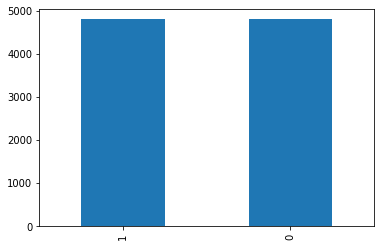

In [ ]:
ros_roberta['bool_HIGH'].value_counts().plot.bar()

In [ ]:
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support , classification_report

is_manual = True

# loop data df
for i in task:

  col = task[i]['col']
  X = list(task[i]['data'][col])
  y = list(task[i]['data']['bool_HIGH'])

  X_test = list(ks_df_test[col])
  y_test = list(ks_df_test['bool_HIGH'])

  max_num_iter = 500

  if is_manual:

    logreg_model = LogisticRegression(max_iter=max_num_iter, random_state=0,multi_class='multinomial')
    logreg_model.fit(X, y)
    y_pred = logreg_model.predict(X_test)
    print(task[i]['language_model'])
    print(classification_report(y_pred, y_test, digits = 4))

    print('\n')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


BERT (RandomOverSampling)
              precision    recall  f1-score   support

           0     0.6290    0.5282    0.5742       337
           1     0.8690    0.9095    0.8888      1160

    accuracy                         0.8236      1497
   macro avg     0.7490    0.7188    0.7315      1497
weighted avg     0.8150    0.8236    0.8180      1497





/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


WangchanBERTa (RandomOverSampling)
              precision    recall  f1-score   support

           0     0.7102    0.4975    0.5852       404
           1     0.8328    0.9250    0.8765      1093

    accuracy                         0.8096      1497
   macro avg     0.7715    0.7113    0.7308      1497
weighted avg     0.7997    0.8096    0.7978      1497



RoBERTa (RandomOverSampling)
              precision    recall  f1-score   support

           0     0.8622    0.7176    0.7833       340
           1     0.9209    0.9663    0.9431      1157

    accuracy                         0.9098      1497
   macro avg     0.8916    0.8420    0.8632      1497
weighted avg     0.9076    0.9098    0.9068      1497





/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


## Random Under Sampling Model (BE,Ro,AL)


In [ ]:
ks_selected_df = ks_da_df

# train test spilt 70/30 ratio
ks_df_train, ks_df_test, ks_df_y_train, ks_df_y_test = train_test_split(ks_selected_df, list(ks_selected_df['bool_HIGH']), test_size=0.2, random_state=0)

data_zip = list(zip(ks_df_train['content_bert_vector'], ks_df_train['coffee_shop_name']))
rus = RandomUnderSampler(random_state=777)
rus_ks_df_train, rus_ks_df_train_y = rus.fit_resample(data_zip, ks_df_y_train)

rus_ks_df_train_0 = [row[0] for row in rus_ks_df_train]

ruc_bert = pd.DataFrame(list(zip(rus_ks_df_train_0, rus_ks_df_train_y)),
               columns =['content_bert_vector', 'bool_HIGH'])


data_zip = list(zip(ks_df_train['content_wangchanberta_vector'], ks_df_train['coffee_shop_name']))
rus = RandomUnderSampler(random_state=777)
rus_ks_df_train, rus_ks_df_train_y = rus.fit_resample(data_zip, ks_df_y_train)

rus_ks_df_train_0 = [row[0] for row in rus_ks_df_train]

ruc_wangchanberta = pd.DataFrame(list(zip(rus_ks_df_train_0, rus_ks_df_train_y)),
               columns =['content_wangchanberta_vector', 'bool_HIGH'])



data_zip = list(zip(ks_df_train['content_roberta_vector'], ks_df_train['coffee_shop_name']))
rus = RandomUnderSampler(random_state=777)
rus_ks_df_train, rus_ks_df_train_y = rus.fit_resample(data_zip, ks_df_y_train)

rus_ks_df_train_0 = [row[0] for row in rus_ks_df_train]

ruc_roberta = pd.DataFrame(list(zip(rus_ks_df_train_0, rus_ks_df_train_y)),
               columns =['content_roberta_vector', 'bool_HIGH'])


task_ruc = {
    "ks_df": {
        'data': ruc_bert,
        'col': 'content_bert_vector',
        'language_model' : 'BERT (RandomUnderSampling)'
    },
    
    "kh_df": {
        'data': ruc_wangchanberta,
        'col': 'content_wangchanberta_vector',
        'language_model' : 'WangchanBERTa (RandomUnderSampling)'
    },
    
    "ka_df": {
        'data': ruc_roberta,
        'col': 'content_roberta_vector',
        'language_model' : 'RoBERTa (RandomUnderSampling)'
    }
}

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:746: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = np.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:746: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = np.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:746: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with differ

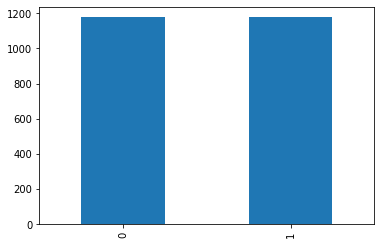

In [ ]:
ruc_roberta['bool_HIGH'].value_counts().plot.bar()

In [ ]:
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support , classification_report

is_manual = True

# loop data df
for i in task_ruc:

  col = task_ruc[i]['col']
  X = list(task_ruc[i]['data'][col])
  y = list(task_ruc[i]['data']['bool_HIGH'])

  X_test = list(ks_df_test[col])
  y_test = list(ks_df_test['bool_HIGH'])

  max_num_iter = 500

  if is_manual:

    logreg_model = LogisticRegression(max_iter=max_num_iter, random_state=0,multi_class='multinomial')
    logreg_model.fit(X, y)
    y_pred = logreg_model.predict(X_test)
    print(task_ruc[i]['language_model'])
    print(classification_report(y_pred, y_test, digits = 4))

    print('\n')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


BERT (RandomUnderSampling)
              precision    recall  f1-score   support

           0     0.7633    0.4625    0.5760       467
           1     0.7932    0.9350    0.8583      1030

    accuracy                         0.7876      1497
   macro avg     0.7782    0.6987    0.7171      1497
weighted avg     0.7839    0.7876    0.7702      1497





/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


WangchanBERTa (RandomUnderSampling)
              precision    recall  f1-score   support

           0     0.7668    0.4297    0.5508       505
           1     0.7628    0.9335    0.8395       992

    accuracy                         0.7635      1497
   macro avg     0.7648    0.6816    0.6951      1497
weighted avg     0.7641    0.7635    0.7421      1497



RoBERTa (RandomUnderSampling)
              precision    recall  f1-score   support

           0     0.8905    0.6702    0.7648       376
           1     0.8979    0.9723    0.9336      1121

    accuracy                         0.8965      1497
   macro avg     0.8942    0.8213    0.8492      1497
weighted avg     0.8960    0.8965    0.8912      1497





/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# **TF-IDF**

## Import Library

In [ ]:
#Import Training and Testing Data
train = pd.read_csv(path + '/ratings_and_sentiments UTF-8.csv')
print("Training Set:"% train.columns, train.shape, len(train))
test = pd.read_csv(path + '/ratings_and_sentiments UTF-8.csv')
print("Test Set:"% test.columns, test.shape, len(test))

Training Set: (7483, 20) 7483
Test Set: (7483, 20) 7483


In [ ]:
#Percentage of High/Low Sentiment
print("High: ", train.bool_HIGH.value_counts()[1]/len(train)*100,"%")
print("Low: ", train.bool_HIGH.value_counts()[0]/len(train)*100,"%")

High:  80.48910864626487 %
Low:  19.510891353735133 %


## Preprocessing

In [ ]:
porter=PorterStemmer()
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def review_text_cleaner(review_text):
    soup = BeautifulSoup(review_text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    #Stemming
    stem_sentence=[]
    for word in words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    words="".join(stem_sentence).strip()
    return words
nums = [0,len(train)]
clean_review_text = []
for i in range(nums[0],nums[1]):
    clean_review_text.append(review_text_cleaner(train['review_text'][i]))
nums = [0,len(test)]
test_review_text = []
for i in range(nums[0],nums[1]):
    test_review_text.append(review_text_cleaner(test['review_text'][i])) 
train_clean = pd.DataFrame(clean_review_text,columns=['review_text'])
train_clean['bool_HIGH'] = train.bool_HIGH
train_clean['coffee_shop_name'] = train.coffee_shop_name
test_clean = pd.DataFrame(test_review_text,columns=['review_text'])
test_clean['coffee_shop_name'] = test.coffee_shop_name

## Feature Extraction

In [ ]:
#split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(train_clean['review_text'],train_clean['bool_HIGH'])
#label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [ ]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=100000)
tfidf_vect.fit(train_clean['review_text'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

## Evaluation

In [ ]:
#Return the f1 Score
def train_model(classifier, feature_vector_train, bool_HIGH, feature_vector_valid, y_validation):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, bool_HIGH)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    return metrics.classification_report(y_validation,predictions,digits = 4)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

y_true = train_y
y_pred = xtrain_tfidf

conf_matrix = confusion_matrix(y_true, y_pred)

classes = ['Class 1', 'Class 2']
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix, cmap='Blues')

ax.set(xticks=np.arange(conf_matrix.shape[1]),
       yticks=np.arange(conf_matrix.shape[0]),
       xticklabels=classes, yticklabels=classes,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(j, i, conf_matrix[i, j],
                ha="center", va="center", color="black")

fig.tight_layout()
plt.show()

TypeError: ignored

### Based line Model (TF-Org)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
accuracyORIGINAL = train_model(linear_model.LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial'),xtrain_tfidf, train_y, xvalid_tfidf,valid_y)
print ("LR_Org", accuracyORIGINAL)

accuracyORIGINAL = train_model(RandomForestClassifier(), xtrain_tfidf, train_y, xvalid_tfidf, valid_y)
print ("RF_Org", accuracyORIGINAL)

accuracyORIGINAL = train_model(svm.LinearSVC(), xtrain_tfidf, train_y, xvalid_tfidf, valid_y)
print ("SVM_Org", accuracyORIGINAL)

accuracyORIGINAL = train_model(MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf, valid_y)
print ("NB_Org", accuracyORIGINAL)

accuracyORIGINAL = train_model(DecisionTreeClassifier(), xtrain_tfidf, train_y, xvalid_tfidf, valid_y)
print ("DT_Org", accuracyORIGINAL)

accuracyORIGINAL = train_model(KNeighborsClassifier(n_neighbors=3), xtrain_tfidf, train_y, xvalid_tfidf, valid_y)
print ("KNN_Org", accuracyORIGINAL)

LR_Org               precision    recall  f1-score   support

           0     0.8837    0.5413    0.6714       351
           1     0.9028    0.9836    0.9414      1520

    accuracy                         0.9006      1871
   macro avg     0.8932    0.7624    0.8064      1871
weighted avg     0.8992    0.9006    0.8908      1871

RF_Org               precision    recall  f1-score   support

           0     0.9722    0.1994    0.3310       351
           1     0.8438    0.9987    0.9147      1520

    accuracy                         0.8487      1871
   macro avg     0.9080    0.5991    0.6229      1871
weighted avg     0.8679    0.8487    0.8052      1871

SVM_Org               precision    recall  f1-score   support

           0     0.7862    0.6496    0.7114       351
           1     0.9222    0.9592    0.9403      1520

    accuracy                         0.9011      1871
   macro avg     0.8542    0.8044    0.8259      1871
weighted avg     0.8967    0.9011    0.8974      187

### Random Over Sampling (TF-ROS)

In [ ]:
#Random Over Sampling
ros = RandomOverSampler(random_state=777)
ros_xtrain_tfidf, ros_train_y = ros.fit_resample(xtrain_tfidf, train_y)

accuracyROS = train_model(linear_model.LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial'),ros_xtrain_tfidf, ros_train_y, xvalid_tfidf,valid_y)
print ("LR_ROS", accuracyROS)

accuracyROS = train_model(RandomForestClassifier(),ros_xtrain_tfidf, ros_train_y, xvalid_tfidf,valid_y)
print ("RF_ROS", accuracyROS)

accuracyROS = train_model(svm.LinearSVC(),ros_xtrain_tfidf, ros_train_y, xvalid_tfidf,valid_y)
print ("SVM_ROS", accuracyROS)

accuracyROS = train_model(MultinomialNB(),ros_xtrain_tfidf, ros_train_y, xvalid_tfidf,valid_y)
print ("NB_ROS", accuracyROS)

accuracyROS = train_model(DecisionTreeClassifier(random_state=0),ros_xtrain_tfidf, ros_train_y, xvalid_tfidf,valid_y)
print ("DT_ROS", accuracyROS)

accuracyROS = train_model(KNeighborsClassifier(n_neighbors=3),ros_xtrain_tfidf, ros_train_y, xvalid_tfidf,valid_y)
print ("KNN_ROS", accuracyROS)


LR_ROS               precision    recall  f1-score   support

           0     0.6387    0.7806    0.7026       351
           1     0.9466    0.8980    0.9217      1520

    accuracy                         0.8760      1871
   macro avg     0.7926    0.8393    0.8121      1871
weighted avg     0.8888    0.8760    0.8806      1871

RF_ROS               precision    recall  f1-score   support

           0     0.9113    0.3219    0.4758       351
           1     0.8638    0.9928    0.9238      1520

    accuracy                         0.8669      1871
   macro avg     0.8875    0.6574    0.6998      1871
weighted avg     0.8727    0.8669    0.8397      1871

SVM_ROS               precision    recall  f1-score   support

           0     0.6649    0.7066    0.6851       351
           1     0.9312    0.9178    0.9245      1520

    accuracy                         0.8781      1871
   macro avg     0.7981    0.8122    0.8048      1871
weighted avg     0.8813    0.8781    0.8795      187

In [ ]:
def conf_matrix(y, y_pred, title, labels):
    fig, ax =plt.subplots(figsize=(7.5,7.5))
    ax=sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap="Pastel1_r", fmt='g', cbar=False, annot_kws={"size":30})
    plt.title(title, fontsize=25)
    ax.xaxis.set_ticklabels(labels, fontsize=16) 
    ax.yaxis.set_ticklabels(labels, fontsize=14.5)
    ax.set_ylabel('Actual', fontsize=25)
    ax.set_xlabel('Predicted', fontsize=25)
    plt.show()

conf_matrix(y_test, bert_preds,' Sentiment Analysis\nConfusion Matrix', sentiments)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

ros = RandomOverSampler(random_state=777)
conf_matrix = train_model(linear_model.LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial'),ros_xtrain_tfidf, ros_train_y, xvalid_tfidf,valid_y)

# Create training and test split
#(X, y, test_size=0.30, random_state=1, stratify=y)

# Create the pipeline
pipeline = make_pipeline(StandardScaler(),
RandomForestClassifier(n_estimators=10, max_features=5, max_depth=2, random_state=1))

# Fit the Pipeline estimator
pipeline.fit(xtrain_tfidf, train_y)

ValueError: ignored

In [ ]:
sc = StandardScaler(with_mean=False)
X_train = sc.fit_transform(xtrain_tfidf)

In [ ]:
xtrain_tfidf, train_y, xvalid_tfidf, valid_y y_validation

In [ ]:
y_validation,predictions

In [ ]:
# Get the predictions
#
y_pred = pipeline.predict(X_train)
#
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=train_y, y_pred= valid_y)
#
# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize = (7.5,7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
  for j in range (conf_matrix.shape[1]):
    ax.text(x=j, y=i, s=conf_matrix[i,j]) #va='center', ha='center', size='xx-large'

  plt.Xlabel('Predictions', fontsize=18)
  plt.ylabel('Actual', fontsize=18)
  plt.title('Confusion Matrix', fontsize=18)
  plt.show()

ValueError: ignored

##Hyperparmeter Optimization

###Logistic Regression

Grid search - LR

In [ ]:
LR_parameters ={
    'C': [20,30,40]}  

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
 %%time
clf = LogisticRegression()
model = GridSearchCV(clf, param_grid=LR_parameters, cv=4, scoring='accuracy',error_score=0, n_jobs=-1)
model.fit(xtrain_tfidf, train_y)
prediction = model.best_estimator_.predict(xvalid_tfidf)
print(confusion_matrix(valid_y,prediction))
print(classification_report(valid_y,prediction,digits = 4))

[[ 228  123]
 [  63 1457]]
              precision    recall  f1-score   support

           0     0.7835    0.6496    0.7103       351
           1     0.9222    0.9586    0.9400      1520

    accuracy                         0.9006      1871
   macro avg     0.8528    0.8041    0.8251      1871
weighted avg     0.8961    0.9006    0.8969      1871

CPU times: user 625 ms, sys: 1.56 s, total: 2.18 s
Wall time: 1.89 s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model.best_params_

{'C': 20}

Random Search - LR

In [ ]:
 %%time
clf = LogisticRegression()
model = RandomizedSearchCV(estimator = clf, param_distributions = LR_parameters, n_iter = 10, cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(xtrain_tfidf, train_y)
prediction = model.best_estimator_.predict(xvalid_tfidf)
print(confusion_matrix(valid_y,prediction))
print(classification_report(valid_y,prediction,digits = 4))

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 4 folds for each of 3 candidates, totalling 12 fits
[[ 228  123]
 [  63 1457]]
              precision    recall  f1-score   support

           0     0.7835    0.6496    0.7103       351
           1     0.9222    0.9586    0.9400      1520

    accuracy                         0.9006      1871
   macro avg     0.8528    0.8041    0.8251      1871
weighted avg     0.8961    0.9006    0.8969      1871

CPU times: user 647 ms, sys: 1.46 s, total: 2.11 s
Wall time: 1.9 s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model.best_params_

{'C': 20}

###Random Forest

Grid Search - RF

In [ ]:
RF_parameters ={
    'max_depth': [50,75,100,125],
    'min_samples_split': [5,10,15],
    'n_estimators': [5,10,15,25]}

In [ ]:
 %%time
clf = RandomForestClassifier()
model = GridSearchCV(clf, param_grid=RF_parameters, cv=4, scoring='accuracy',error_score=0, n_jobs=-1)
model.fit(xtrain_tfidf, train_y)
prediction = model.best_estimator_.predict(xvalid_tfidf)
print(confusion_matrix(valid_y,prediction))
print(classification_report(valid_y,prediction,digits = 4))

[[  99  252]
 [   7 1513]]
              precision    recall  f1-score   support

           0     0.9340    0.2821    0.4333       351
           1     0.8572    0.9954    0.9212      1520

    accuracy                         0.8616      1871
   macro avg     0.8956    0.6387    0.6772      1871
weighted avg     0.8716    0.8616    0.8296      1871

CPU times: user 1.35 s, sys: 67.9 ms, total: 1.41 s
Wall time: 31.1 s


In [ ]:
model.best_params_

{'max_depth': 125, 'min_samples_split': 5, 'n_estimators': 15}

Random Search - RF

In [ ]:
RF_random ={
    'max_depth': [25,50,75,100,125,150],
    'min_samples_split': [5,10,15],
    'n_estimators': [5,10,15,25]}

In [ ]:
 %%time
clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = RF_random, n_iter = 10, cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(xtrain_tfidf, train_y)
prediction = model.best_estimator_.predict(xvalid_tfidf)
print(confusion_matrix(valid_y,prediction))
print(classification_report(valid_y,prediction,digits = 4))

Fitting 4 folds for each of 10 candidates, totalling 40 fits
[[  88  263]
 [   8 1512]]
              precision    recall  f1-score   support

           0     0.9167    0.2507    0.3937       351
           1     0.8518    0.9947    0.9178      1520

    accuracy                         0.8552      1871
   macro avg     0.8842    0.6227    0.6557      1871
weighted avg     0.8640    0.8552    0.8194      1871

CPU times: user 811 ms, sys: 10.7 ms, total: 822 ms
Wall time: 6.94 s


In [ ]:
model.best_params_

{'n_estimators': 15, 'min_samples_split': 5, 'max_depth': 125}

###Naive Bayes

Grid Search -NB

In [ ]:
NB_TF ={
    'var_smoothing': (0.001,0.01,0.1,1,10,100)}

In [ ]:
 %%time
clf = GaussianNB()
model = GridSearchCV(clf, param_grid= NB_TF, cv=4, scoring='accuracy',error_score=0, n_jobs=-1)
model.fit(xtrain_tfidf.toarray(), train_y)
prediction = model.best_estimator_.predict(xvalid_tfidf.toarray())
print(confusion_matrix(valid_y,prediction))
print(classification_report(valid_y,prediction,digits = 4))

/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[[ 217  134]
 [ 104 1416]]
              precision    recall  f1-score   support

           0     0.6760    0.6182    0.6458       351
           1     0.9135    0.9316    0.9225      1520

    accuracy                         0.8728      1871
   macro avg     0.7948    0.7749    0.7842      1871
weighted avg     0.8690    0.8728    0.8706      1871

CPU times: user 1.29 s, sys: 721 ms, total: 2.01 s
Wall time: 12.8 s


In [ ]:
model.best_params_

{'var_smoothing': 1}

Random Search - NB

In [ ]:
 %%time
clf = GaussianNB()
model = RandomizedSearchCV(estimator = clf, param_distributions = NB_TF, n_iter = 10, cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(xtrain_tfidf.toarray(), train_y)
prediction = model.best_estimator_.predict(xvalid_tfidf.toarray())
print(confusion_matrix(valid_y,prediction))
print(classification_report(valid_y,prediction,digits = 4))

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 4 folds for each of 6 candidates, totalling 24 fits


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[[ 217  134]
 [ 104 1416]]
              precision    recall  f1-score   support

           0     0.6760    0.6182    0.6458       351
           1     0.9135    0.9316    0.9225      1520

    accuracy                         0.8728      1871
   macro avg     0.7948    0.7749    0.7842      1871
weighted avg     0.8690    0.8728    0.8706      1871

CPU times: user 1.3 s, sys: 451 ms, total: 1.75 s
Wall time: 12.9 s


In [ ]:
model.best_params_

{'var_smoothing': 1}

###Support Vector Machine

Grid Search - SVM

In [ ]:
SVM_parameters ={
    'C' : [0.1,1,10]}

In [ ]:
 %%time
clf = svm.LinearSVC()
model = GridSearchCV(clf, param_grid= SVM_parameters, cv=4, scoring='accuracy',error_score=0, n_jobs=-1)
model.fit(xtrain_tfidf, train_y)
prediction = model.best_estimator_.predict(xvalid_tfidf)
print(confusion_matrix(valid_y,prediction))
print(classification_report(valid_y,prediction,digits = 4))

[[ 220  154]
 [  41 1456]]
              precision    recall  f1-score   support

           0     0.8429    0.5882    0.6929       374
           1     0.9043    0.9726    0.9372      1497

    accuracy                         0.8958      1871
   macro avg     0.8736    0.7804    0.8151      1871
weighted avg     0.8921    0.8958    0.8884      1871

CPU times: user 96.4 ms, sys: 5.66 ms, total: 102 ms
Wall time: 642 ms


In [ ]:
model.best_params_

{'C': 1}

Random search - SVM

In [ ]:
 %%time
clf = svm.LinearSVC()
model = RandomizedSearchCV(estimator = clf, param_distributions = SVM_parameters, n_iter = 10, cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(xtrain_tfidf, train_y)
prediction = model.best_estimator_.predict(xvalid_tfidf)
print(confusion_matrix(valid_y,prediction))
print(classification_report(valid_y,prediction,digits = 4))

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 4 folds for each of 3 candidates, totalling 12 fits
[[ 220  154]
 [  41 1456]]
              precision    recall  f1-score   support

           0     0.8429    0.5882    0.6929       374
           1     0.9043    0.9726    0.9372      1497

    accuracy                         0.8958      1871
   macro avg     0.8736    0.7804    0.8151      1871
weighted avg     0.8921    0.8958    0.8884      1871

CPU times: user 89.7 ms, sys: 7.03 ms, total: 96.7 ms
Wall time: 581 ms


In [ ]:
model.best_params_

{'C': 1}

###Decision Tree

Grid Search - DT

In [ ]:
DT_grid ={
    'max_depth': [5,10,15,20],
    'min_samples_split': [10,15,25]}

In [ ]:
 %%time
clf = DecisionTreeClassifier()
model = GridSearchCV(clf, param_grid= DT_grid, cv=4, scoring='accuracy',error_score=0, n_jobs=-1)
model.fit(xtrain_tfidf, train_y)
prediction = model.best_estimator_.predict(xvalid_tfidf)
print(confusion_matrix(valid_y,prediction))
print(classification_report(valid_y,prediction,digits = 4))

NameError: ignored

In [ ]:
model.best_params_

{'max_depth': 10, 'min_samples_split': 15}

Random Search - DT

In [ ]:
DT_random ={
    'max_depth': [5,10,15,20],
    'min_samples_split': [10,15,25]}

In [ ]:
 %%time
clf = DecisionTreeClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = DT_random, n_iter = 10, cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(xtrain_tfidf, train_y)
prediction = model.best_estimator_.predict(xvalid_tfidf)
print(confusion_matrix(valid_y,prediction))
print(classification_report(valid_y,prediction,digits = 4))

Fitting 4 folds for each of 10 candidates, totalling 40 fits
[[ 129  245]
 [ 102 1395]]
              precision    recall  f1-score   support

           0     0.5584    0.3449    0.4264       374
           1     0.8506    0.9319    0.8894      1497

    accuracy                         0.8145      1871
   macro avg     0.7045    0.6384    0.6579      1871
weighted avg     0.7922    0.8145    0.7968      1871

CPU times: user 793 ms, sys: 14.7 ms, total: 807 ms
Wall time: 10.5 s


In [ ]:
model.best_params_

{'min_samples_split': 15, 'max_depth': 10}

###K-Nearest Neighbor

Grid Search - KNN

In [ ]:
KNN_parameters ={
    'weights': ['uniform', 'distance'],
    'n_neighbors': [2,4,6,8,10,12,14,16,18,20]}

In [ ]:
 %%time
clf = KNeighborsClassifier()
model = GridSearchCV(clf, param_grid= KNN_parameters, cv=4, scoring='accuracy',error_score=0, n_jobs=-1)
model.fit(xtrain_tfidf, train_y)
prediction = model.best_estimator_.predict(xvalid_tfidf)
print(confusion_matrix(valid_y,prediction))
print(classification_report(valid_y,prediction,digits = 4))

[[ 150  224]
 [  58 1439]]
              precision    recall  f1-score   support

           0     0.7212    0.4011    0.5155       374
           1     0.8653    0.9613    0.9108      1497

    accuracy                         0.8493      1871
   macro avg     0.7932    0.6812    0.7131      1871
weighted avg     0.8365    0.8493    0.8317      1871

CPU times: user 1.07 s, sys: 24.2 ms, total: 1.1 s
Wall time: 17.8 s


In [ ]:
model.best_params_

{'n_neighbors': 12, 'weights': 'distance'}

Random Search - KNN

In [ ]:
 %%time
clf = KNeighborsClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = KNN_parameters, n_iter = 10, cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(xtrain_tfidf, train_y)
prediction = model.best_estimator_.predict(xvalid_tfidf)
print(confusion_matrix(valid_y,prediction))
print(classification_report(valid_y,prediction,digits = 4))

Fitting 4 folds for each of 10 candidates, totalling 40 fits
[[ 152  222]
 [  78 1419]]
              precision    recall  f1-score   support

           0     0.6609    0.4064    0.5033       374
           1     0.8647    0.9479    0.9044      1497

    accuracy                         0.8397      1871
   macro avg     0.7628    0.6772    0.7039      1871
weighted avg     0.8240    0.8397    0.8242      1871

CPU times: user 866 ms, sys: 229 ms, total: 1.09 s
Wall time: 11 s


In [ ]:
model.best_params_

{'weights': 'distance', 'n_neighbors': 8}

### SMOTE (TF-SMOTE)

In [ ]:
#SMOTE
sm = SMOTE(random_state=777) #, ratio = 1.0)
sm_xtrain_tfidf, sm_train_y = sm.fit_resample(xtrain_tfidf, train_y)

accuracySMOTE = train_model(linear_model.LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial'),sm_xtrain_tfidf, sm_train_y, xvalid_tfidf,valid_y)
print ("LR_SM", accuracySMOTE)
accuracySMOTE = train_model(svm.LinearSVC(),sm_xtrain_tfidf, sm_train_y, xvalid_tfidf,valid_y)
print ("SVM_SM", accuracySMOTE)

accuracySMOTE = train_model(RandomForestClassifier(),sm_xtrain_tfidf, sm_train_y, xvalid_tfidf,valid_y)
print ("RF_SM", accuracySMOTE)

LR_SM               precision    recall  f1-score   support

           0       0.68      0.79      0.73       359
           1       0.95      0.91      0.93      1512

    accuracy                           0.89      1871
   macro avg       0.82      0.85      0.83      1871
weighted avg       0.90      0.89      0.89      1871

SVM_SM               precision    recall  f1-score   support

           0       0.72      0.75      0.73       359
           1       0.94      0.93      0.93      1512

    accuracy                           0.90      1871
   macro avg       0.83      0.84      0.83      1871
weighted avg       0.90      0.90      0.90      1871

RF_SM               precision    recall  f1-score   support

           0       0.73      0.33      0.45       359
           1       0.86      0.97      0.91      1512

    accuracy                           0.85      1871
   macro avg       0.79      0.65      0.68      1871
weighted avg       0.83      0.85      0.82      1871



In [ ]:
sm = SMOTE(random_state=777) #, ratio = 1.0)
sm_xtrain_tfidf, sm_train_y = sm.fit_resample(xtrain_tfidf, train_y)
sm_xvalid_tfidf, sm_valid_y = sm.fit_resample(xvalid_tfidf,valid_y)

accuracySMOTE = train_model(linear_model.LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial'),sm_xtrain_tfidf, sm_train_y, sm_xvalid_tfidf,sm_valid_y)
print ("LR_SM_val", accuracySMOTE)

accuracySMOTE = train_model(svm.LinearSVC(),sm_xtrain_tfidf, sm_train_y, sm_xvalid_tfidf,sm_valid_y)
print ("SVM_SM_val", accuracySMOTE)

accuracySMOTE = train_model(RandomForestClassifier(random_state=0),sm_xtrain_tfidf, sm_train_y, sm_xvalid_tfidf,sm_valid_y)
print ("rf_SM_val", accuracySMOTE)

LR_SM_val               precision    recall  f1-score   support

           0       0.91      0.87      0.89      1512
           1       0.88      0.91      0.90      1512

    accuracy                           0.89      3024
   macro avg       0.89      0.89      0.89      3024
weighted avg       0.89      0.89      0.89      3024

SVM_SM_val               precision    recall  f1-score   support

           0       0.92      0.83      0.87      1512
           1       0.84      0.93      0.88      1512

    accuracy                           0.88      3024
   macro avg       0.88      0.88      0.88      3024
weighted avg       0.88      0.88      0.88      3024

rf_SM_val               precision    recall  f1-score   support

           0       0.97      0.73      0.83      1512
           1       0.79      0.97      0.87      1512

    accuracy                           0.85      3024
   macro avg       0.88      0.85      0.85      3024
weighted avg       0.88      0.85      0.85

### Random Under Smapling (TF-RUS)

In [ ]:
#Random Under Sampling
rus = RandomUnderSampler(random_state=777)
rus_xtrain_tfidf, rus_train_y = rus.fit_resample(xtrain_tfidf, train_y)
accuracyRUS = train_model(linear_model.LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial'),rus_xtrain_tfidf, rus_train_y, xvalid_tfidf,valid_y)
print ("LR_RUS", accuracyRUS)
accuracyRUS = train_model(svm.LinearSVC(),rus_xtrain_tfidf, rus_train_y, xvalid_tfidf,valid_y)
print ("SVM_RUS", accuracyRUS)
accuracyRUS = train_model(RandomForestClassifier(),rus_xtrain_tfidf, rus_train_y, xvalid_tfidf,valid_y)
print ("RF_RUS", accuracyRUS)

LR_RUS               precision    recall  f1-score   support

           0       0.57      0.87      0.69       359
           1       0.96      0.84      0.90      1512

    accuracy                           0.85      1871
   macro avg       0.77      0.85      0.79      1871
weighted avg       0.89      0.85      0.86      1871

SVM_RUS               precision    recall  f1-score   support

           0       0.56      0.86      0.68       359
           1       0.96      0.84      0.90      1512

    accuracy                           0.85      1871
   macro avg       0.76      0.85      0.79      1871
weighted avg       0.89      0.85      0.86      1871

RF_RUS               precision    recall  f1-score   support

           0       0.51      0.84      0.63       359
           1       0.96      0.80      0.87      1512

    accuracy                           0.81      1871
   macro avg       0.73      0.82      0.75      1871
weighted avg       0.87      0.81      0.83      187

In [ ]:
#Percentage of High/Low Sentiment
print("Class: ", sum (sm_train_y)/len(sm_train_y)*100,"%")

Class:  50.0 %
